# Project statement  : Forecast sales for Walmart.

Description:
Sales forecasting is a critical task in business. In this project, you'll use TensorFlow and Python to build a
sales forecasting model for Walmart. You'll learn about time series analysis and regression techniques to
predict future sales trends

Tools: TensorFlow, Python


📚 Concepts: Time Series Analysis, Regression

# Data Describe

Data được cung cấp ở kaggle

About Dataset

Walmart Sales Forecast

shutterstock_1150637408.avif

Problem:

There are many seasons that sales are significantly higher or lower than averages. If the company does not know about these seasons, it can lose too much money. Predicting future sales is one of the most crucial plans for a company. Sales forecasting gives an idea to the company for arranging stocks, calculating revenue, and deciding to make a new investment. Another advantage of knowing future sales is that achieving predetermined targets from the beginning of the seasons can have a positive effect on stock prices and investors' perceptions. Also, not reaching the projected target could significantly damage stock prices, conversely. And, it will be a big problem especially for Walmart as a big company.

Aim:

My aim in this project is to build a model which predicts sales of the stores. With this model, Walmart authorities can decide their future plans which is very important for arranging stocks, calculating revenue and deciding to make new investment or not.

Solution:

With the accurate prediction company can;

Determine seasonal demands and take action for this
Protect from money loss because achieving sales targets can have a positive effect on stock prices and investors' perceptions
Forecast revenue easily and accurately
Manage inventories
Do more effective campaigns
Plan:
Understanding, Cleaning and Exploring Data

Preparing Data to Modeling

Random Forest Regressor

ARIMA/ExponentialSmooting/ARCH Models

Metric:

The metric of the competition is weighted mean absolute error (WMAE). Weight of the error changes when it is holiday.

Understanding, Cleaning and Exploring Data: The first challange of this data is that there are too much seasonal effects on sales. Some departments have higher sales in some seasons but on average the best departments are different. To analyze these effects, data divided weeks of the year and also holiday dates categorized.

Preparing Data to Modeling: Boolean and string features encoded and whole columns encoded.

Random Forest Regressor: Feature selection was done according to feature importance and as a best result 1801 error found.

ARIMA/ExponentialSmooting/ARCH Models: Second challange in this data is that it is not stationary. To make data more stationary taking difference,log and shift techniques applied. The least error was found with ExponentialSmooting as 821.

Findings:

Although some departments has higher sales, on average others can be best. It shows us, some departments has effect on sales on some seasons like Thanksgiving.
It is same for stores, means that some areas has higher seasonal sales.
Stores has 3 types as A, B and C according to their sizes. Almost half of the stores are bigger than 150000 and categorized as A. According to type, sales of the stores are changing.
As expected, holiday average sales are higher than normal dates.
Top 4 sales belongs to Christmas, Thankgiving and Black Friday times. Interestingly, 22th week of the year is the 5th best sales. It is end of May and the time when schools are closed.
Christmas holiday introduces as the last days of the year. But people generally shop at 51th week. So, when we look at the total sales of holidays, Thankgiving has higher sales between them which was assigned by Walmart. But, when we look at the data we can understand it is not a good idea to assign Christmas sales in data to last days of the year. It must assign 51th week.
January sales are significantly less than other months. This is the result of November and December high sales. After two high sales month, people prefer to pay less on January.
CPI, temperature, unemployment rate and fuel price have no pattern on weekly sales.
More detailed finding can be found in notebooks with explorations.

Future Improvements:

Data will be made more stationary with different techniques.

More detailed feature engineering and feature selection will be done.

More data can be found to observe holiday effects on sales and different holidays will be added like Easter, Halloween and Come Back to School times.

Markdown effects on model will be improved according to department sales.

Different models can be build for special stores or departments.



In [ ]:
import pandas as pd
import numpy as np

import tensorflow as tfs


In [ ]:
!pip install opendatasets

Load data

In [ ]:
import opendatasets as od

od.download("https://www.kaggle.com/datasets/aslanahmedov/walmart-sales-forecast/data")

Skipping, found downloaded files in "./walmart-sales-forecast" (use force=True to force download)


In [ ]:
od.download('https://www.kaggle.com/datasets/yasserh/walmart-dataset')

Skipping, found downloaded files in "./walmart-dataset" (use force=True to force download)


In [ ]:
df = pd.read_csv("walmart-dataset/Walmart.csv", parse_dates = ['Date'])

<ipython-input-103-627e8b2d4d23>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df = pd.read_csv("walmart-dataset/Walmart.csv", parse_dates = ['Date'])


In [ ]:
df_stores = pd.read_csv('walmart-sales-forecast/stores.csv')

In [ ]:
df_features = pd.read_csv("walmart-sales-forecast/features.csv")

In [ ]:
df_test = pd.read_csv("walmart-sales-forecast/test.csv")

In [ ]:
df_train = pd.read_csv("walmart-sales-forecast/train.csv")

# First look to data and merging three dataframes

In [ ]:
df_stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [ ]:
df_train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [ ]:
df_features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [ ]:
df = df_train.merge(df_features, on = ['Store', 'Date'], how = 'inner').merge(df_stores, on = ['Store'], how = 'inner')

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315


In [ ]:
df.drop(['IsHoliday_y'], axis = 1, inplace = True)

In [ ]:
df.rename(columns = {'IsHoliday_x' : 'IsHoliday'}, inplace = True)

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,2,2010-02-05,50605.27,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
2,1,3,2010-02-05,13740.12,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
3,1,4,2010-02-05,39954.04,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
4,1,5,2010-02-05,32229.38,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315


In [ ]:
df.tail()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
421565,45,93,2012-10-26,2487.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421566,45,94,2012-10-26,5203.31,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421567,45,95,2012-10-26,56017.47,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421568,45,97,2012-10-26,6817.48,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221
421569,45,98,2012-10-26,1076.80,False,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,B,118221


Understanding, Cleaning and Exploring Data



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [ ]:
for i in ['Store','Dept']:
  print(df[i].nunique())

45
81


có 45 cửa hàng và 81 gian hàng

In [ ]:
df[df['Weekly_Sales'] <= 0]

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
188,1,47,2010-02-19,-863.00,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
406,1,47,2010-03-12,-698.00,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
2549,1,47,2010-10-08,-58.00,False,63.93,2.633,NaN,NaN,NaN,NaN,NaN,211.746754,7.838,A,151315
3632,1,54,2011-01-21,-50.00,False,44.04,3.016,NaN,NaN,NaN,NaN,NaN,211.827234,7.742,A,151315
4132,1,47,2011-03-11,0.00,False,53.56,3.459,NaN,NaN,NaN,NaN,NaN,214.111056,7.742,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420066,45,49,2012-05-25,-4.97,False,67.21,3.798,5370.39,NaN,361.22,1287.62,2461.81,191.002810,8.567,B,118221
420403,45,49,2012-06-29,-34.00,False,75.22,3.506,3291.36,425.60,NaN,314.88,2255.34,191.099246,8.567,B,118221
420736,45,49,2012-08-03,-1.91,False,76.58,3.654,24853.05,39.56,17.96,11142.69,2768.32,191.164090,8.684,B,118221
421007,45,54,2012-08-31,0.00,False,75.09,3.867,23641.30,6.00,92.93,6988.31,3992.13,191.461281,8.684,B,118221


In [ ]:
df = df[df['Weekly_Sales'] >= 0]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 420285 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         420285 non-null  int64  
 1   Dept          420285 non-null  int64  
 2   Date          420285 non-null  object 
 3   Weekly_Sales  420285 non-null  float64
 4   IsHoliday     420285 non-null  bool   
 5   Temperature   420285 non-null  float64
 6   Fuel_Price    420285 non-null  float64
 7   MarkDown1     150200 non-null  float64
 8   MarkDown2     110918 non-null  float64
 9   MarkDown3     136667 non-null  float64
 10  MarkDown4     134535 non-null  float64
 11  MarkDown5     150948 non-null  float64
 12  CPI           420285 non-null  float64
 13  Unemployment  420285 non-null  float64
 14  Type          420285 non-null  object 
 15  Size          420285 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.7+ MB


# Số ngày lễ

In [ ]:
import seaborn as sns

<Axes: xlabel='IsHoliday', ylabel='Weekly_Sales'>

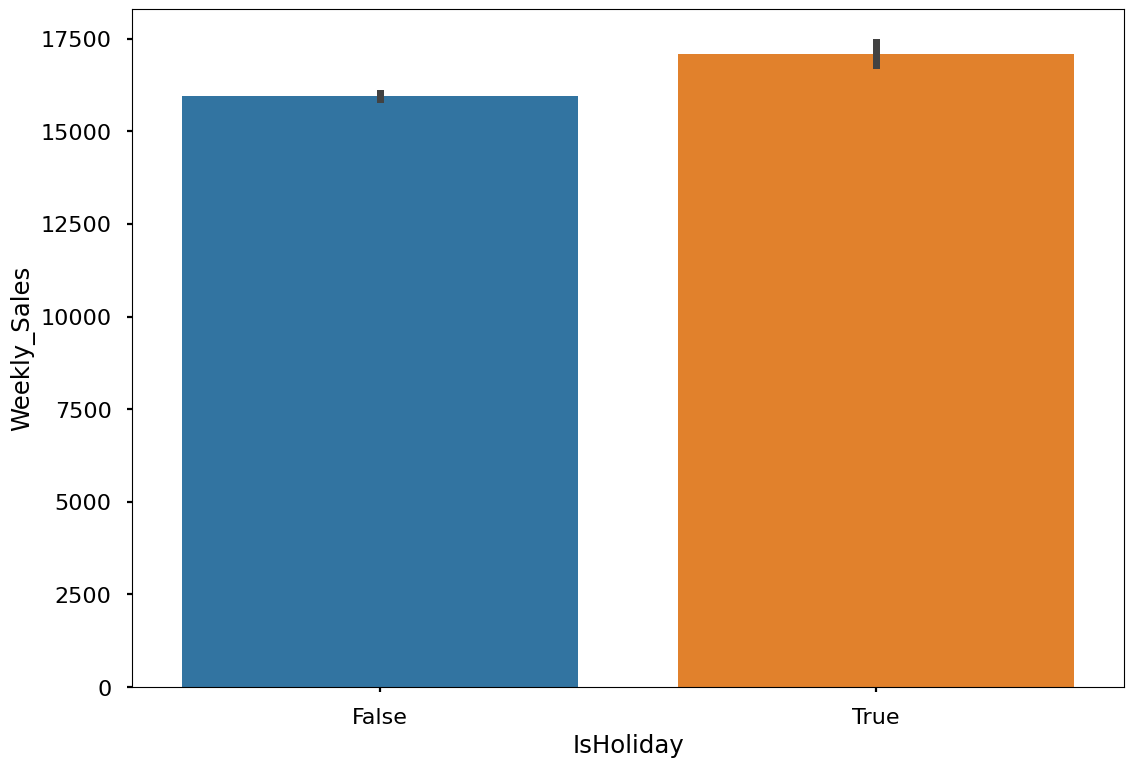

In [ ]:
sns.barplot(x='IsHoliday', y='Weekly_Sales', data=df)


In [ ]:
df_holiday = df.loc[df['IsHoliday']==True]
df_holiday['Date'].unique()

array(['2010-02-12', '2010-09-10', '2010-11-26', '2010-12-31',
       '2011-02-11', '2011-09-09', '2011-11-25', '2011-12-30',
       '2012-02-10', '2012-09-07'], dtype=object)

All holidays are not in the data. There are 4 holiday values such as;

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13

Labor Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13

Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13

Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

After the 07-Sep-2012 holidays are in test set for prediction. When we look at the data, average weekly sales for holidays are significantly higher than not-holiday days. In train data, there are 133 weeks for non-holiday and 10 weeks for holiday.

I want to see differences between holiday types. So, I create new columns for 4 types of holidays and fill them with boolean values. If date belongs to this type of holiday it is True, if not False.

In [ ]:
# Super bowl dates in train set
df.loc[(df['Date'] == '2010-02-12')|(df['Date'] == '2011-02-11')|(df['Date'] == '2012-02-10'),'Super_Bowl'] = True
df.loc[(df['Date'] != '2010-02-12')&(df['Date'] != '2011-02-11')&(df['Date'] != '2012-02-10'),'Super_Bowl'] = False

# Labor day dates in train set
df.loc[(df['Date'] == '2010-09-10')|(df['Date'] == '2011-09-09')|(df['Date'] == '2012-09-07'),'Labor_Day'] = True
df.loc[(df['Date'] != '2010-09-10')&(df['Date'] != '2011-09-09')&(df['Date'] != '2012-09-07'),'Labor_Day'] = False

# Thanksgiving dates in train set
df.loc[(df['Date'] == '2010-11-26')|(df['Date'] == '2011-11-25'),'Thanksgiving'] = True
df.loc[(df['Date'] != '2010-11-26')&(df['Date'] != '2011-11-25'),'Thanksgiving'] = False

#Christmas dates in train set
df.loc[(df['Date'] == '2010-12-31')|(df['Date'] == '2011-12-30'),'Christmas'] = True
df.loc[(df['Date'] != '2010-12-31')&(df['Date'] != '2011-12-30'),'Christmas'] = False



<Axes: xlabel='Christmas', ylabel='Weekly_Sales'>

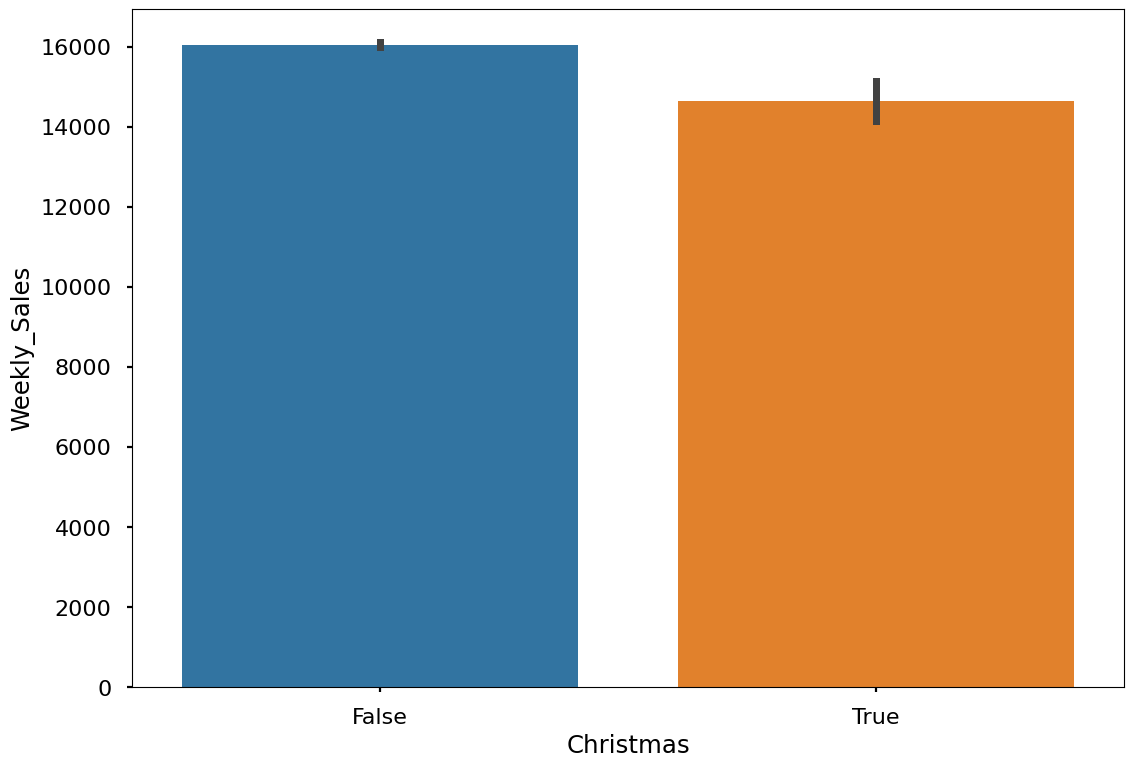

In [ ]:
sns.barplot(x='Christmas', y='Weekly_Sales', data=df) # Christmas holiday vs not-Christmas


<Axes: xlabel='Thanksgiving', ylabel='Weekly_Sales'>

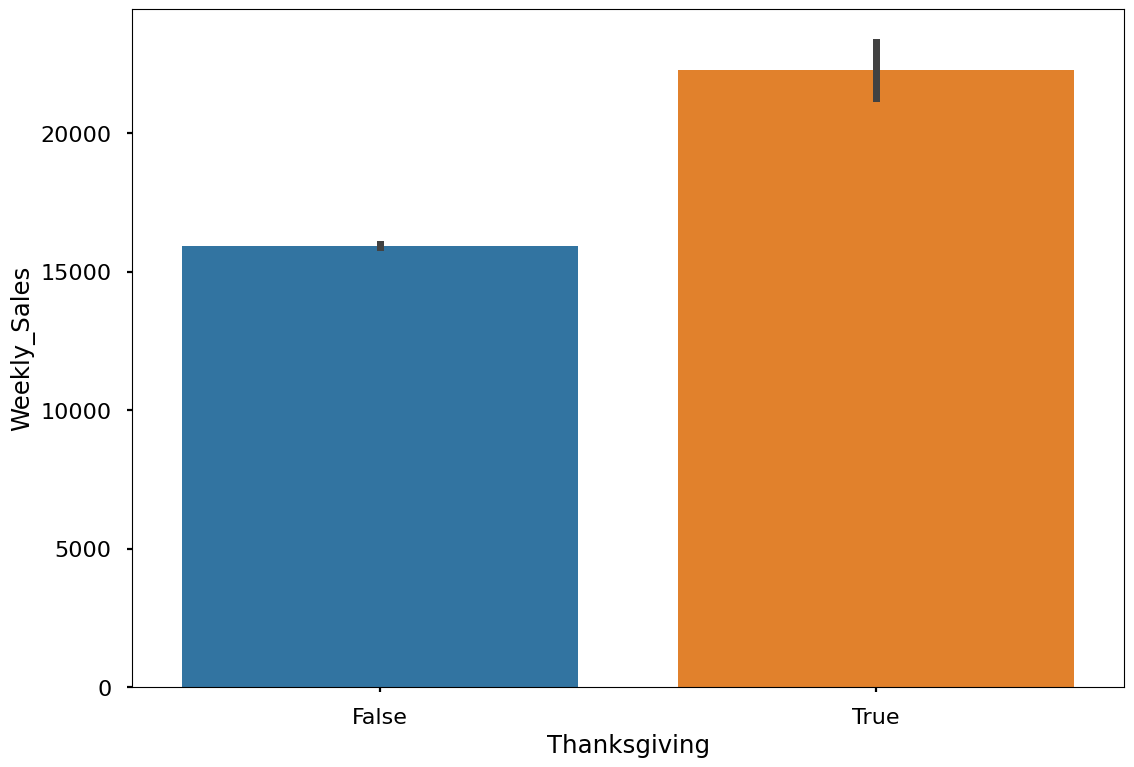

In [ ]:
sns.barplot(x='Thanksgiving', y='Weekly_Sales', data=df) # Thanksgiving holiday vs not-thanksgiving

<Axes: xlabel='Super_Bowl', ylabel='Weekly_Sales'>

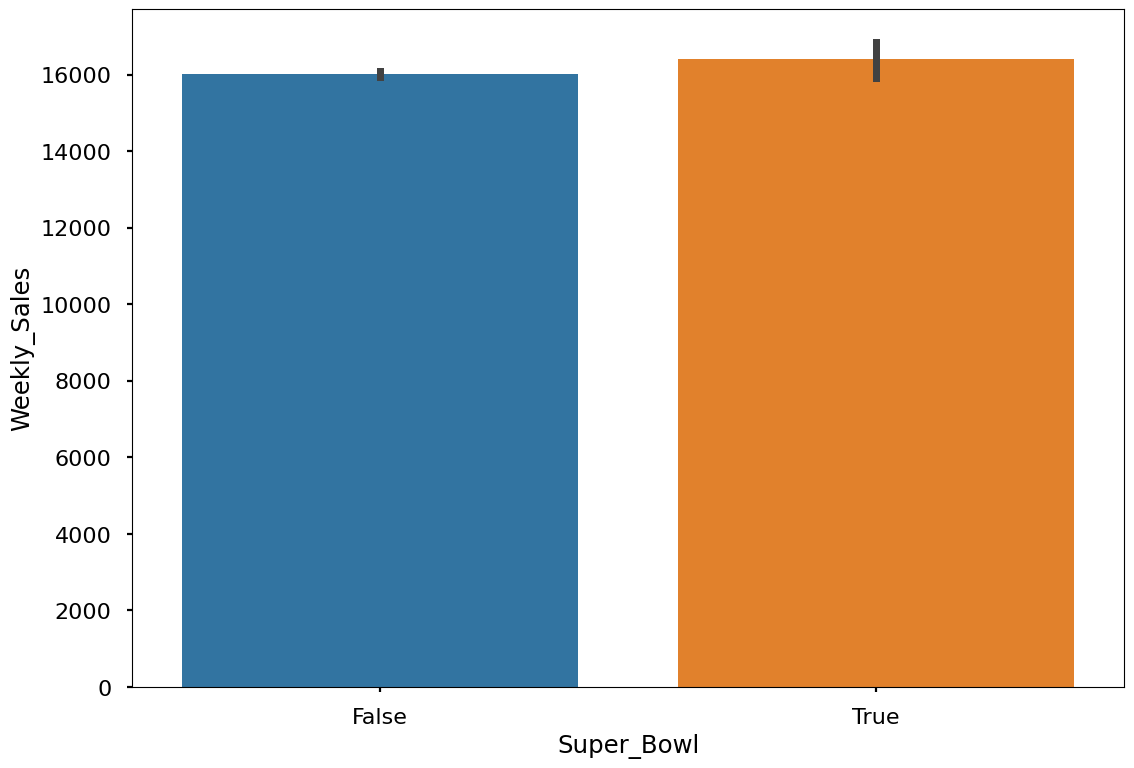

In [ ]:
sns.barplot(x='Super_Bowl', y='Weekly_Sales', data=df) # Super bowl holiday vs not-super bowl

<Axes: xlabel='Labor_Day', ylabel='Weekly_Sales'>

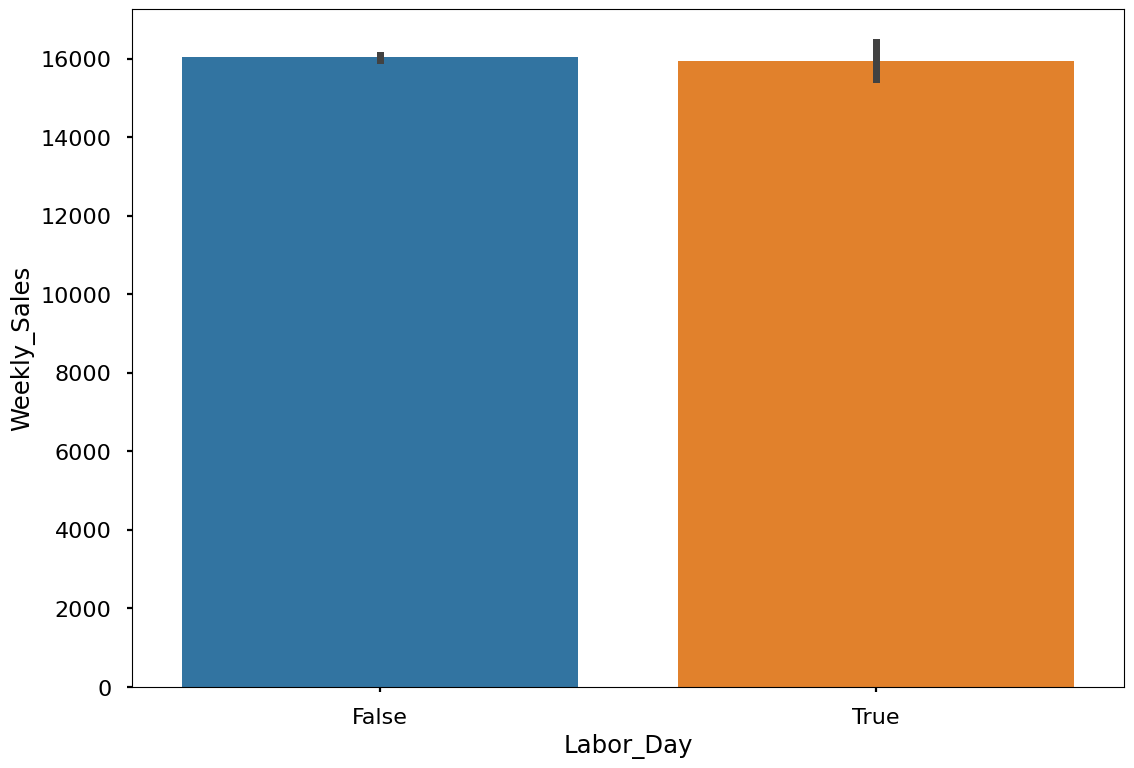

In [ ]:
sns.barplot(x='Labor_Day', y='Weekly_Sales', data=df) # Labor day holiday vs not-labor day

In [ ]:
df.groupby(['Christmas','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Christmas


Christmas  Type
False      A       20171.304550
           B       12299.610446
           C        9568.895179
True       A       18310.167535
           B       11483.973221
           C        8031.520607
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Labor_Day','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Labor Day


Labor_Day  Type
False      A       20148.146905
           B       12292.563234
           C        9540.033102
True       A       20004.267422
           B       12080.755653
           C        9893.459258
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Thanksgiving','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Thanksgiving


Thanksgiving  Type
False         A       20040.981576
              B       12195.285567
              C        9545.326177
True          A       27397.776346
              B       18733.973971
              C        9696.566616
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby(['Super_Bowl','Type'])['Weekly_Sales'].mean()  # Avg weekly sales for types on Super Bowl


Super_Bowl  Type
False       A       20134.993683
            B       12284.349447
            C        9534.047011
True        A       20612.757674
            B       12463.412421
            C       10179.271884
Name: Weekly_Sales, dtype: float64

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl

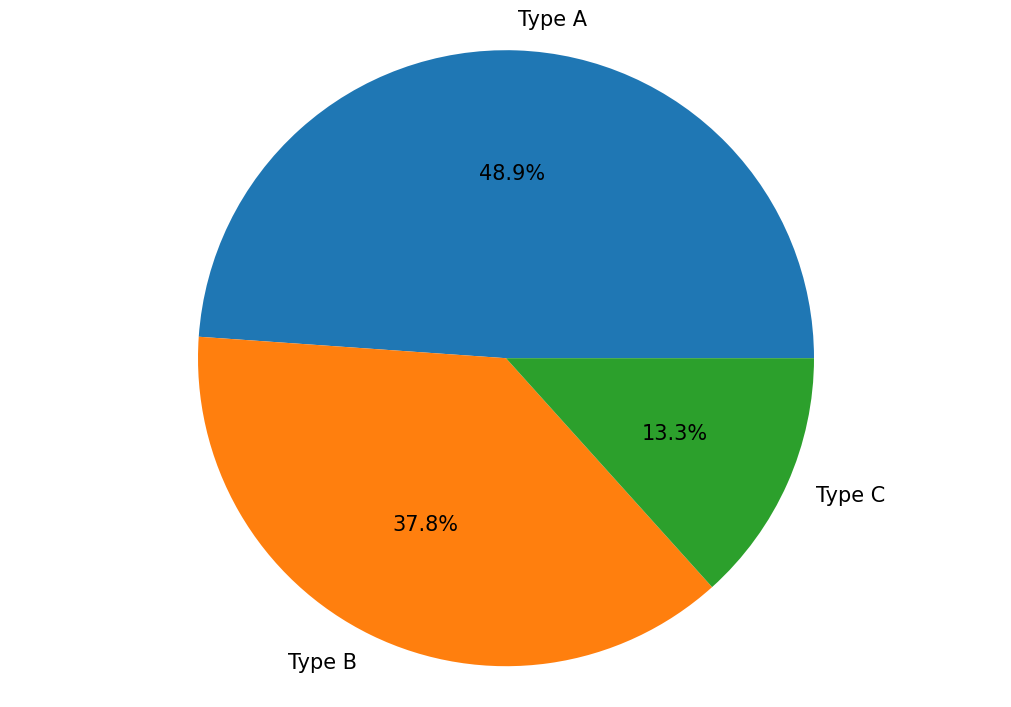

In [ ]:
my_data = [48.88, 37.77 , 13.33 ]  #percentages
my_labels = 'Type A','Type B', 'Type C' # labels
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15}) #plot pie type and bigger the labels
plt.axis('equal')
mpl.rcParams.update({'font.size': 20}) #bigger percentage labels

plt.show()

In [ ]:
df.groupby('IsHoliday')['Weekly_Sales'].mean()


IsHoliday
False    15949.958317
True     17092.566220
Name: Weekly_Sales, dtype: float64

<ipython-input-138-985733ab0b41>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


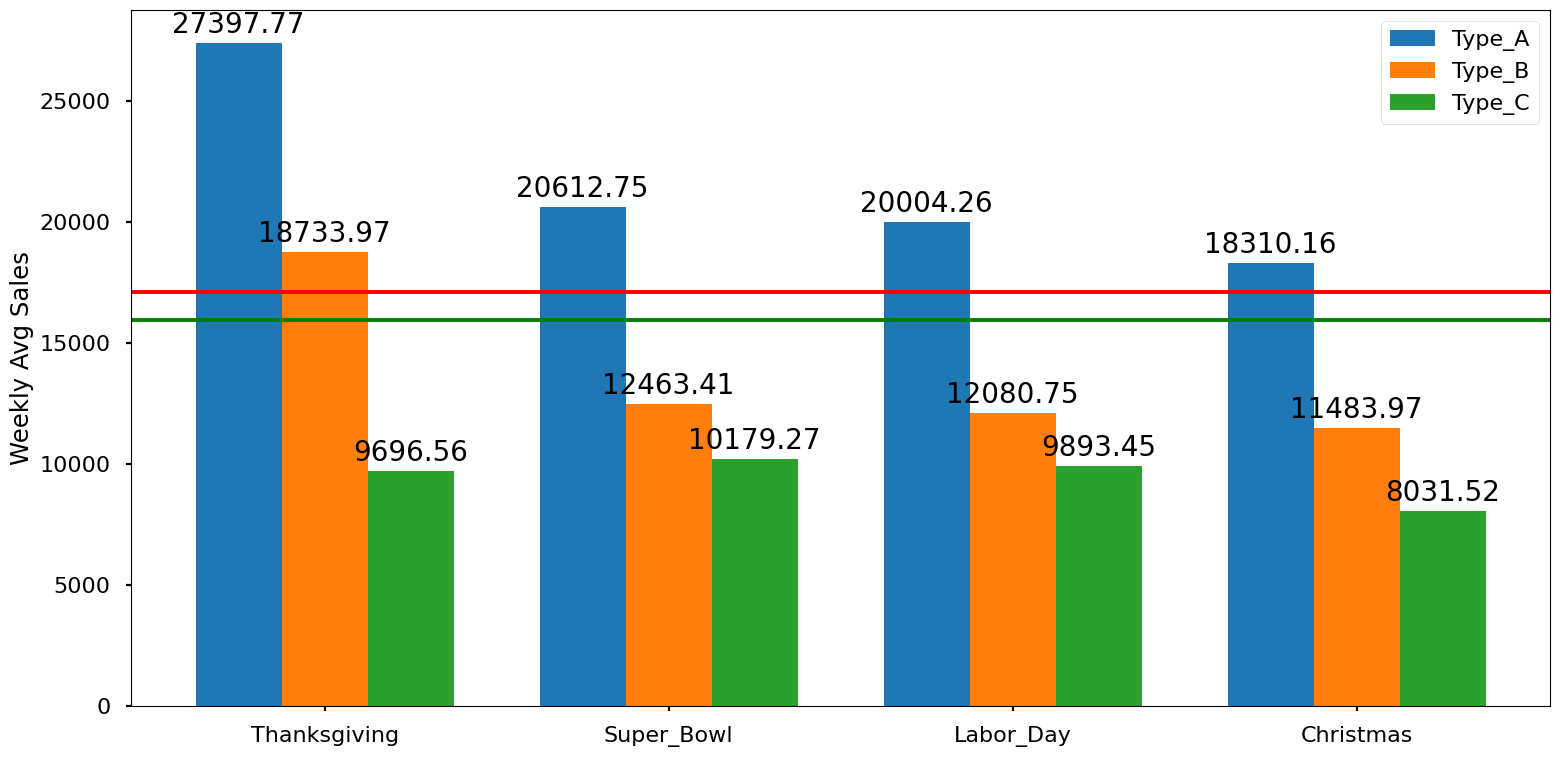

In [ ]:
# Plotting avg wekkly sales according to holidays by types
plt.style.use('seaborn-poster')
labels = ['Thanksgiving', 'Super_Bowl', 'Labor_Day', 'Christmas']
A_means = [27397.77, 20612.75, 20004.26, 18310.16]
B_means = [18733.97, 12463.41, 12080.75, 11483.97]
C_means = [9696.56,10179.27,9893.45,8031.52]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(16, 8))
rects1 = ax.bar(x - width, A_means, width, label='Type_A')
rects2 = ax.bar(x , B_means, width, label='Type_B')
rects3 = ax.bar(x + width, C_means, width, label='Type_C')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Weekly Avg Sales')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

plt.axhline(y=17094.30,color='r') # holidays avg
plt.axhline(y=15952.82,color='green') # not-holiday avg

fig.tight_layout()

plt.show()

In [ ]:
df.sort_values(by='Weekly_Sales',ascending=False).head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
90645,10,72,2010-11-26,693099.36,True,55.33,3.162,NaN,NaN,NaN,NaN,NaN,126.669267,9.003,B,126512,False,False,True,False
337053,35,72,2011-11-25,649770.18,True,47.88,3.492,1333.24,NaN,58563.24,20.97,6386.86,140.421786,8.745,B,103681,False,False,True,False
94393,10,72,2011-11-25,630999.19,True,60.68,3.760,174.72,329.0,141630.61,79.00,1009.98,129.836400,7.874,B,126512,False,False,True,False
333594,35,72,2010-11-26,627962.93,True,46.67,3.039,NaN,NaN,NaN,NaN,NaN,136.689571,8.763,B,103681,False,False,True,False
131088,14,72,2010-11-26,474330.10,True,46.15,3.039,NaN,NaN,NaN,NaN,NaN,182.783277,8.724,A,200898,False,False,True,False


In [ ]:
df_stores.groupby('Type').describe()['Size'].round(2) # See the Size-Type relation


,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
A,22.0,177247.73,49392.62,39690.0,155840.75,202406.0,203819.0,219622.0
B,17.0,101190.71,32371.14,34875.0,93188.00,114533.0,123737.0,140167.0
C,6.0,40541.67,1304.15,39690.0,39745.00,39910.0,40774.0,42988.0


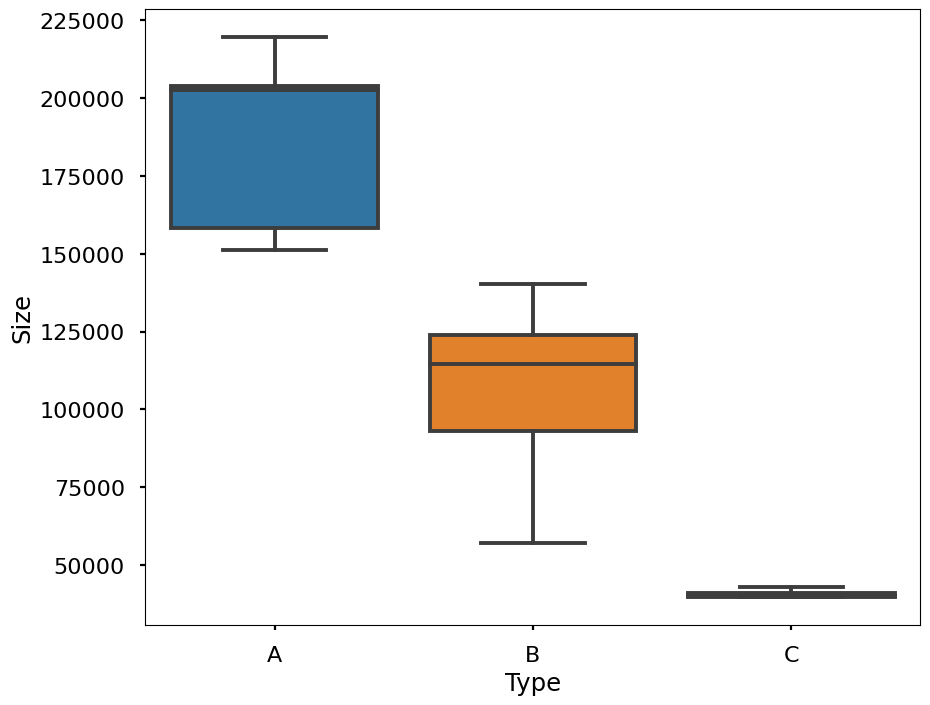

In [ ]:
plt.figure(figsize=(10,8)) # To see the type-size relation
fig = sns.boxplot(x='Type', y='Size', data=df, showfliers=False)

Từ đồ thị trên ta có thể kết luận các cửa hàng có quy mô lớn thì doanh thì càng lớn

xử lý markdown columns

In [ ]:
df.isna().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270085
MarkDown2       309367
MarkDown3       283618
MarkDown4       285750
MarkDown5       269337
CPI                  0
Unemployment         0
Type                 0
Size                 0
Super_Bowl           0
Labor_Day            0
Thanksgiving         0
Christmas            0
dtype: int64

In [ ]:
mean_values = df.mean()

# Điền các giá trị thiếu bằng giá trị trung bình của cột đó
df.fillna(mean_values, inplace=True)


<ipython-input-143-a905bd2b72fe>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean_values = df.mean()


In [ ]:
df.isna().sum() # last null check


Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Super_Bowl      0
Labor_Day       0
Thanksgiving    0
Christmas       0
dtype: int64

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False
1,1,2,2010-02-05,50605.27,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False
2,1,3,2010-02-05,13740.12,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False
3,1,4,2010-02-05,39954.04,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False
4,1,5,2010-02-05,32229.38,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False


In [ ]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000,420285.000000
mean,22.195477,44.242771,16030.329773,60.090474,3.360888,7247.781936,3329.917771,1441.588079,3384.718610,4629.478027,171.212152,7.960077,136749.569176
std,12.787213,30.507197,22728.500149,18.448260,0.458523,4957.566729,4859.738258,5492.232979,3561.451749,3571.709056,39.162280,1.863873,60992.688568
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2117.560000,46.680000,2.933000,7247.781936,3329.917771,115.390000,3384.718610,4629.478027,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7659.090000,62.090000,3.452000,7247.781936,3329.917771,1441.588079,3384.718610,4629.478027,182.350989,7.866000,140167.000000
75%,33.000000,74.000000,20268.380000,74.280000,3.738000,7247.781936,3329.917771,1441.588079,3384.718610,4629.478027,212.445487,8.567000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


# Deeper look in Sales

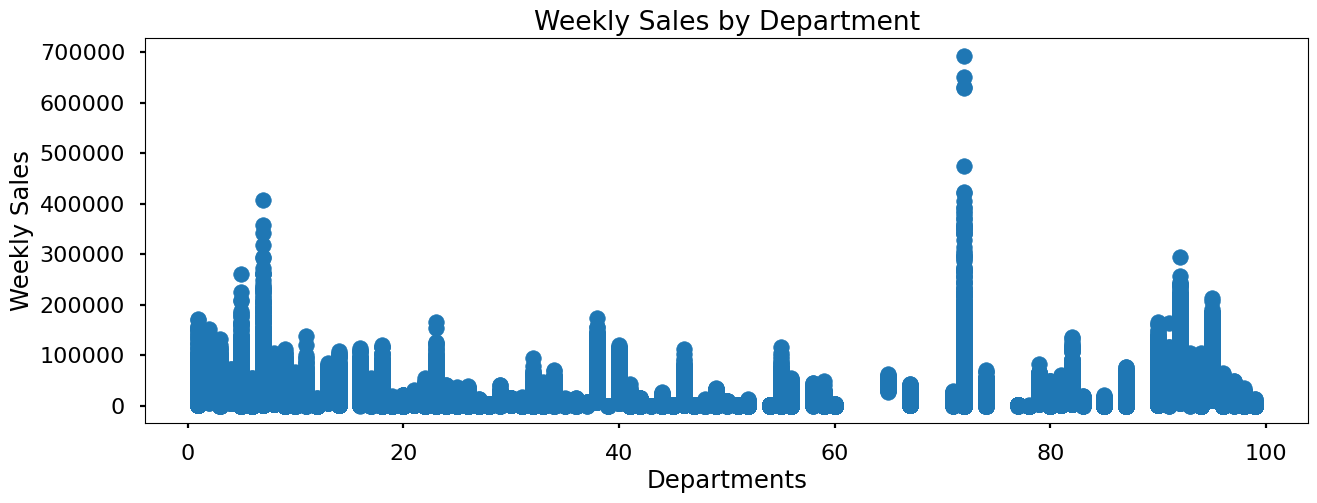

In [ ]:
x = df['Dept']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Department')
plt.xlabel('Departments')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

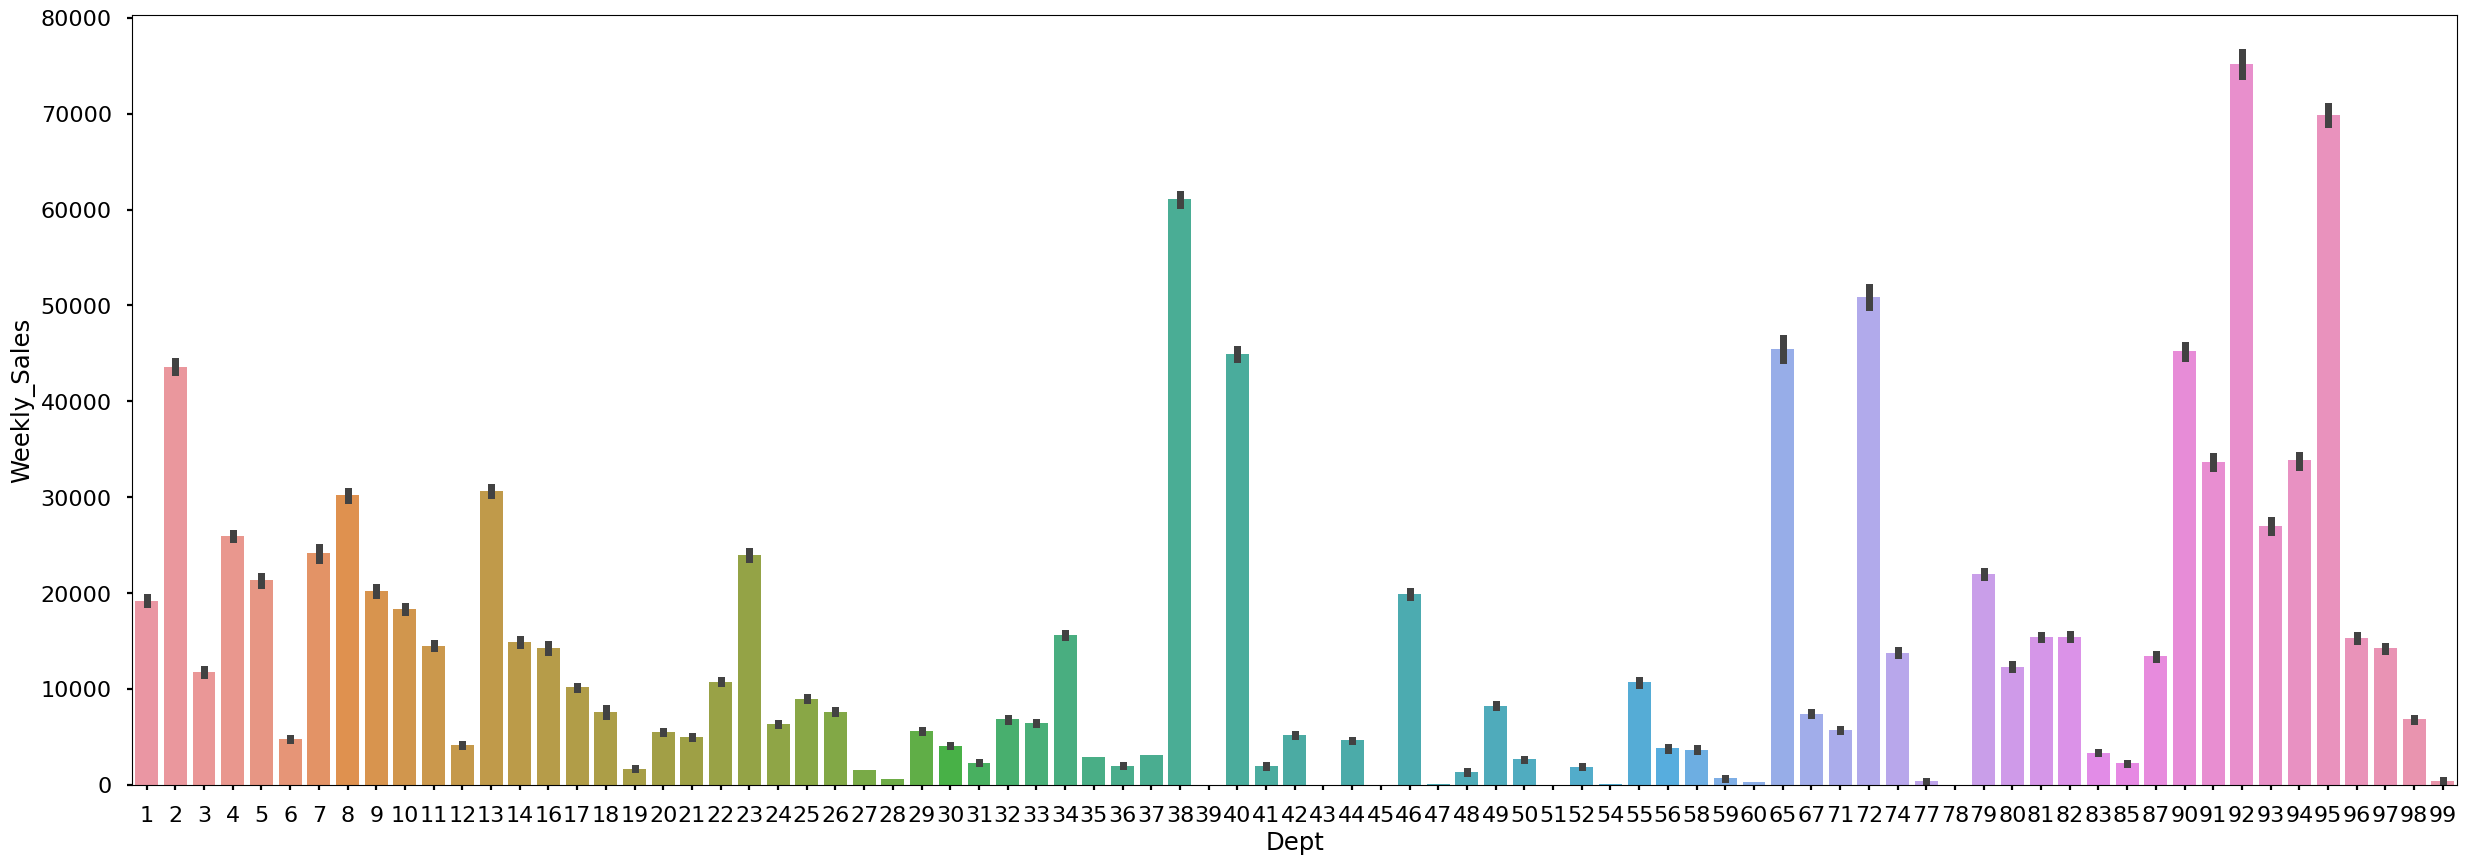

In [ ]:
plt.figure(figsize=(30,10))
fig = sns.barplot(x='Dept', y='Weekly_Sales', data=df)

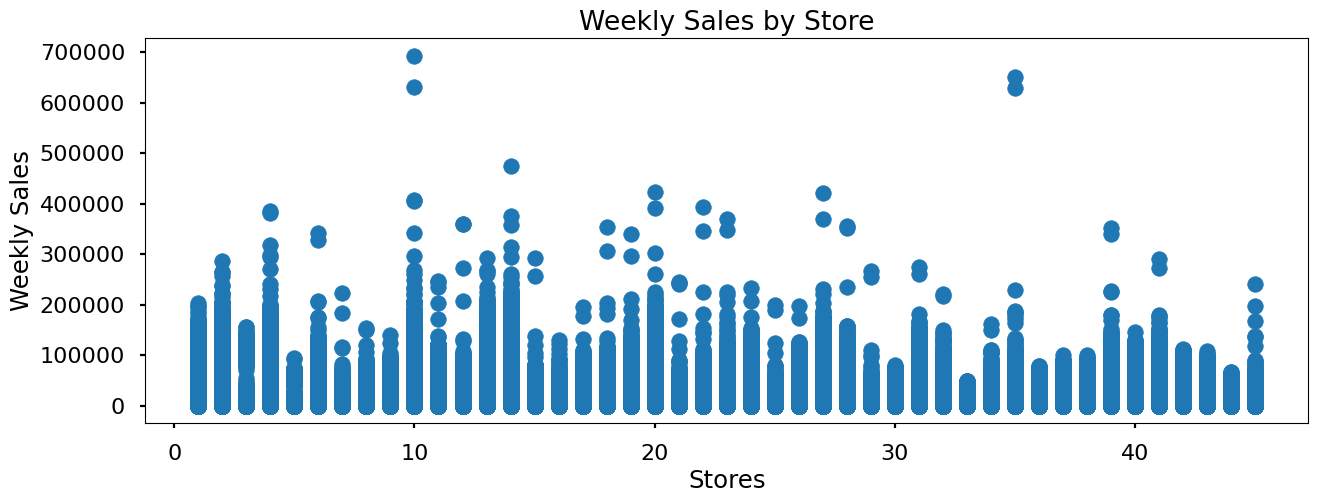

In [ ]:
x = df['Store']
y = df['Weekly_Sales']
plt.figure(figsize=(15,5))
plt.title('Weekly Sales by Store')
plt.xlabel('Stores')
plt.ylabel('Weekly Sales')
plt.scatter(x,y)
plt.show()

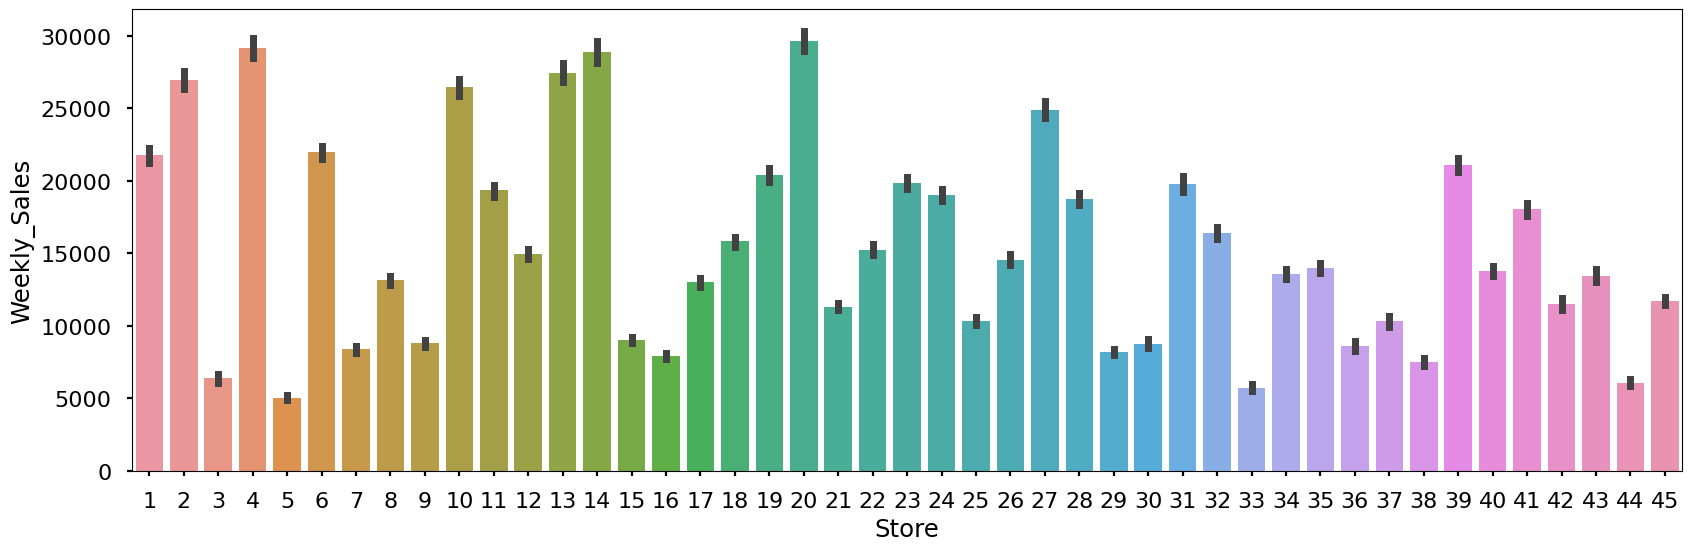

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='Store', y='Weekly_Sales', data=df)

In [ ]:
df["Date"] = pd.to_datetime(df["Date"]) # convert to datetime
df['week'] =df['Date'].dt.week
df['month'] =df['Date'].dt.month
df['year'] =df['Date'].dt.year

<ipython-input-151-fe0c64419917>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df['week'] =df['Date'].dt.week


In [ ]:
df.groupby('month')['Weekly_Sales'].mean() # to see the best months for sales


month
1     14177.402925
2     16044.626423
3     15462.397412
4     15693.388747
5     15843.753725
6     16394.151442
7     15903.137562
8     16109.142779
9     15145.234221
10    15277.585465
11    17533.475488
12    19424.490336
Name: Weekly_Sales, dtype: float64

In [ ]:
df.groupby('year')['Weekly_Sales'].mean() # to see the best years for sales


year
2010    16315.740243
2011    16004.658586
2012    15746.033424
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='month'>

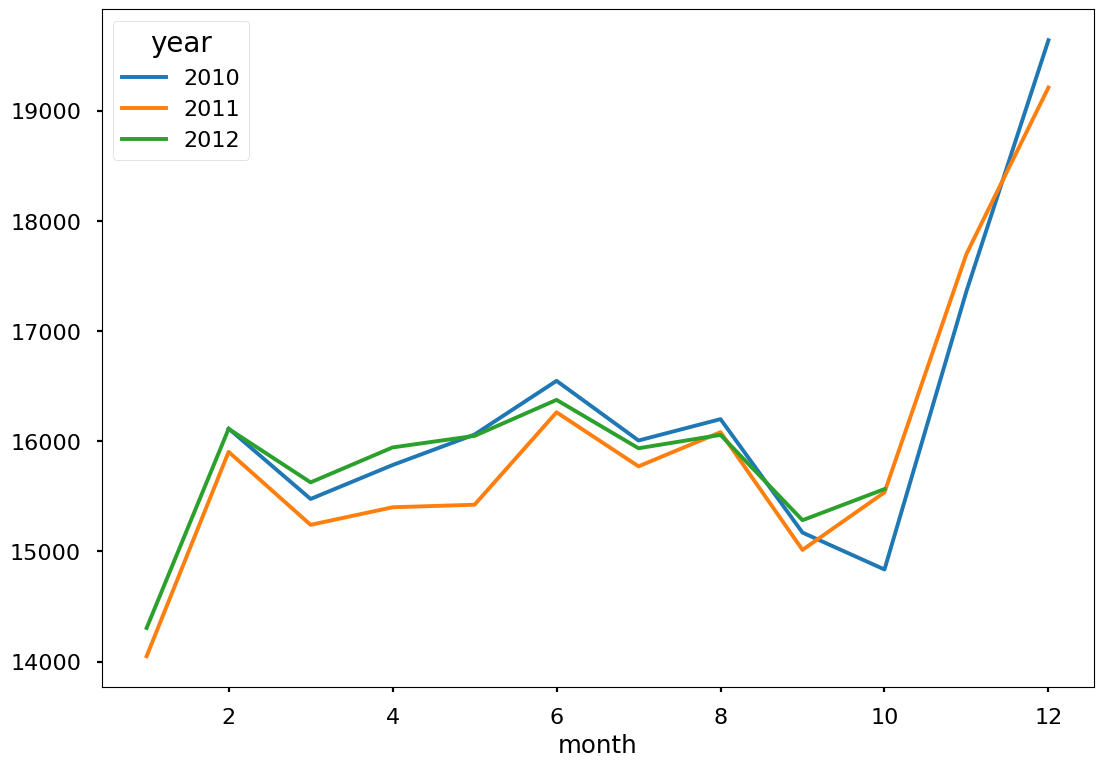

In [ ]:
monthly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "month")
monthly_sales.plot()

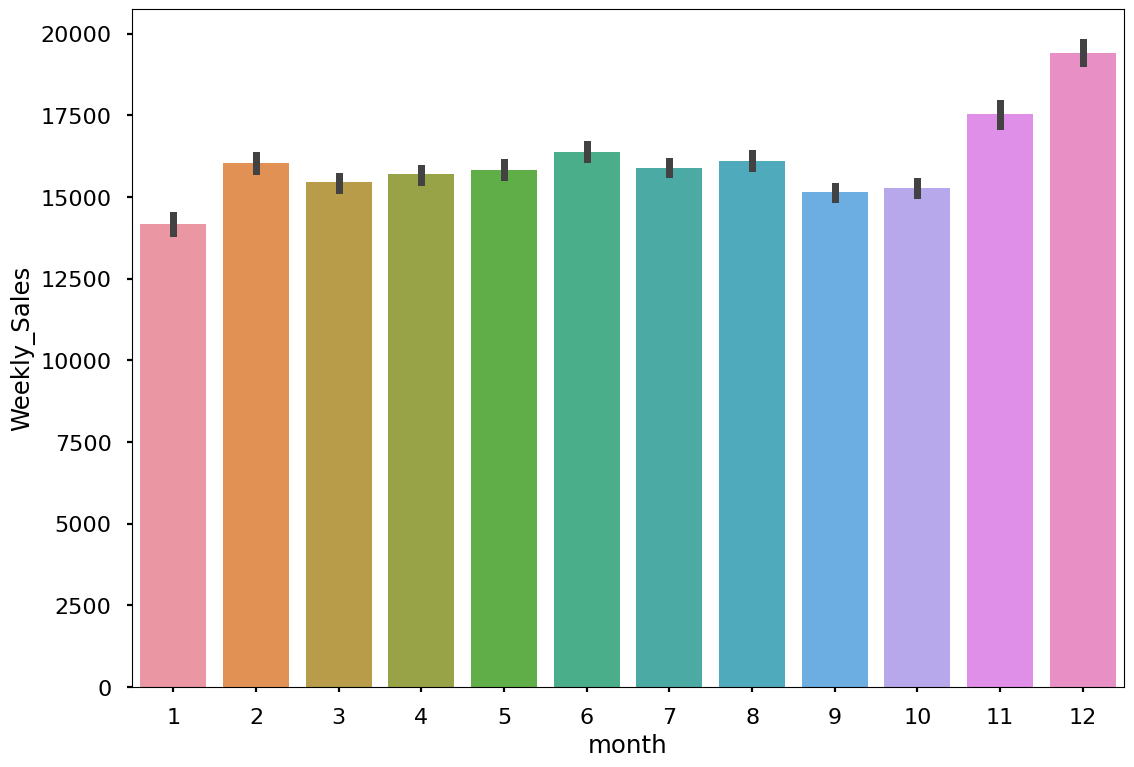

In [ ]:
fig = sns.barplot(x='month', y='Weekly_Sales', data=df)


In [ ]:
df.groupby('week')['Weekly_Sales'].mean().sort_values(ascending=False).head()

week
51    26449.733674
47    22269.601768
50    20478.421134
49    18731.794840
22    16852.791563
Name: Weekly_Sales, dtype: float64

<Axes: xlabel='week'>

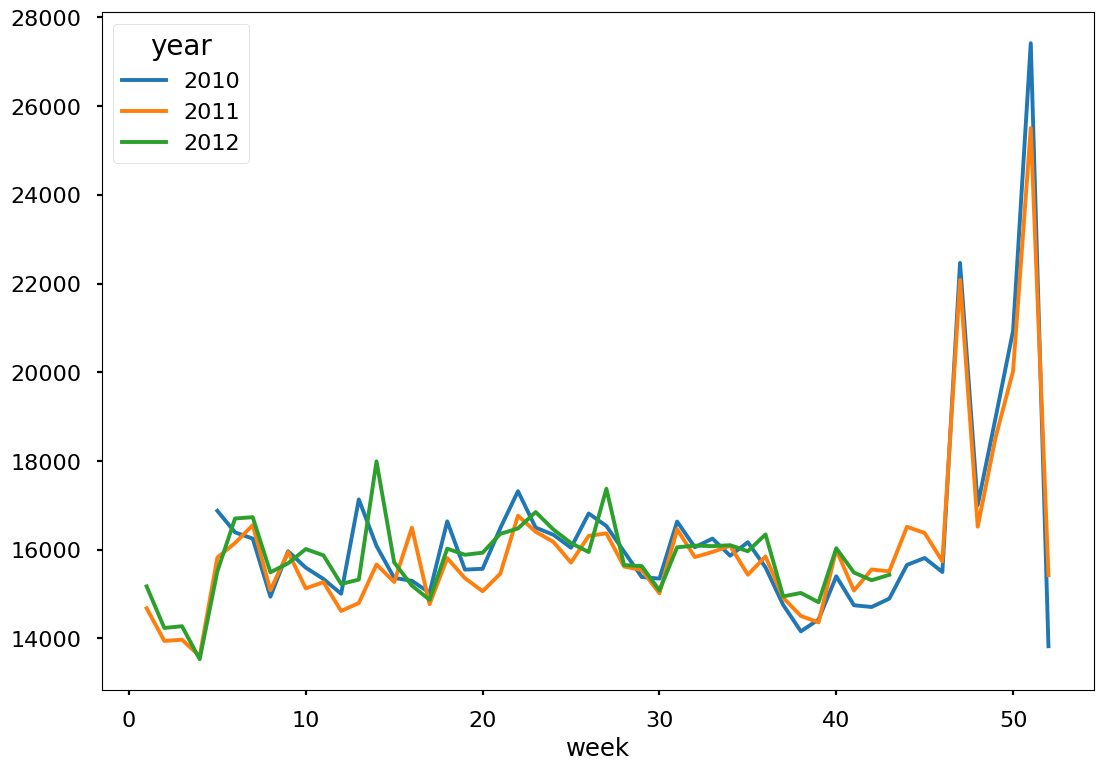

In [ ]:
weekly_sales = pd.pivot_table(df, values = "Weekly_Sales", columns = "year", index = "week")
weekly_sales.plot()

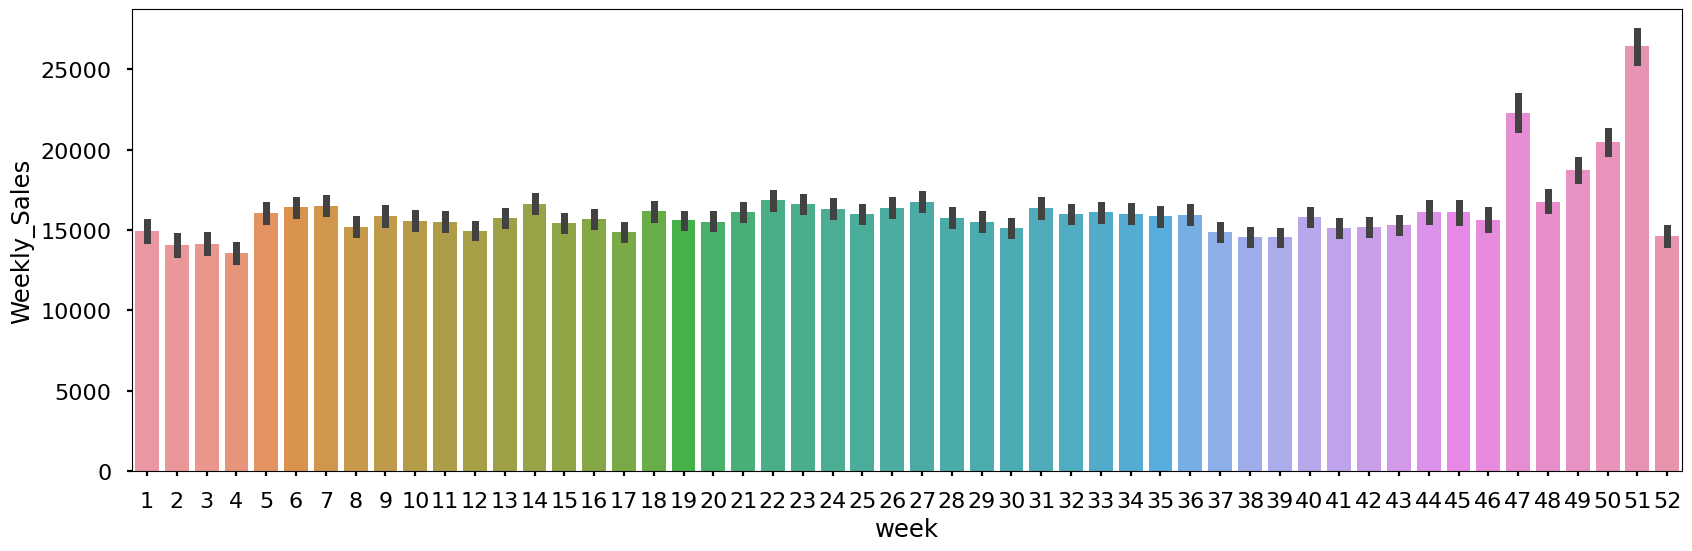

In [ ]:
plt.figure(figsize=(20,6))
fig = sns.barplot(x='week', y='Weekly_Sales', data=df)

# Fuel Price, CPI , Unemployment , Temperature Effects

<Axes: xlabel='Fuel_Price'>

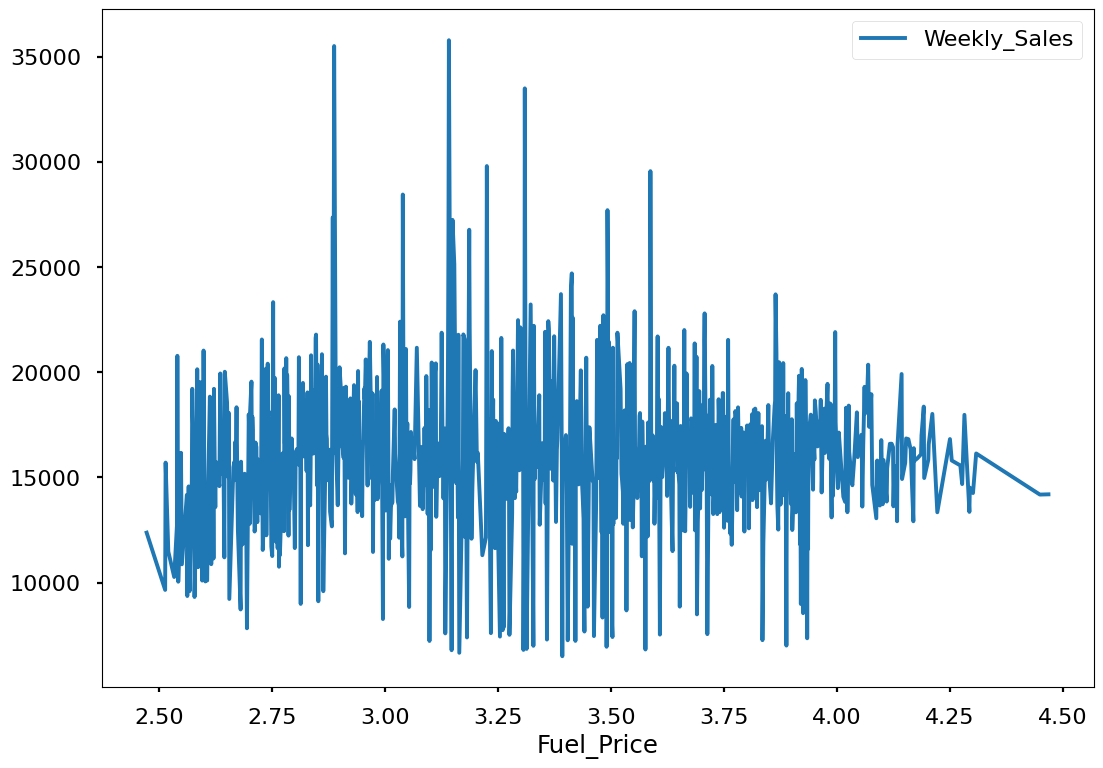

In [ ]:
fuel_price = pd.pivot_table(df, values = "Weekly_Sales", index= "Fuel_Price")
fuel_price.plot()

<Axes: xlabel='Temperature'>

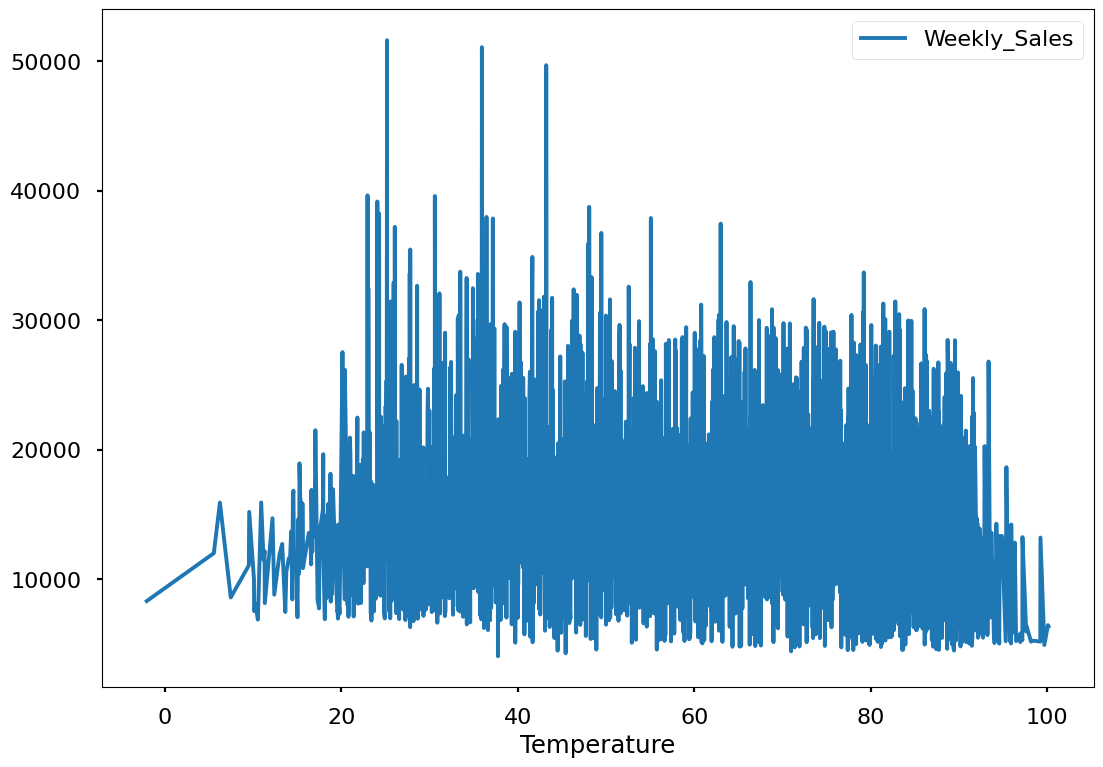

In [ ]:
temp = pd.pivot_table(df, values = "Weekly_Sales", index= "Temperature")
temp.plot()

<Axes: xlabel='CPI'>

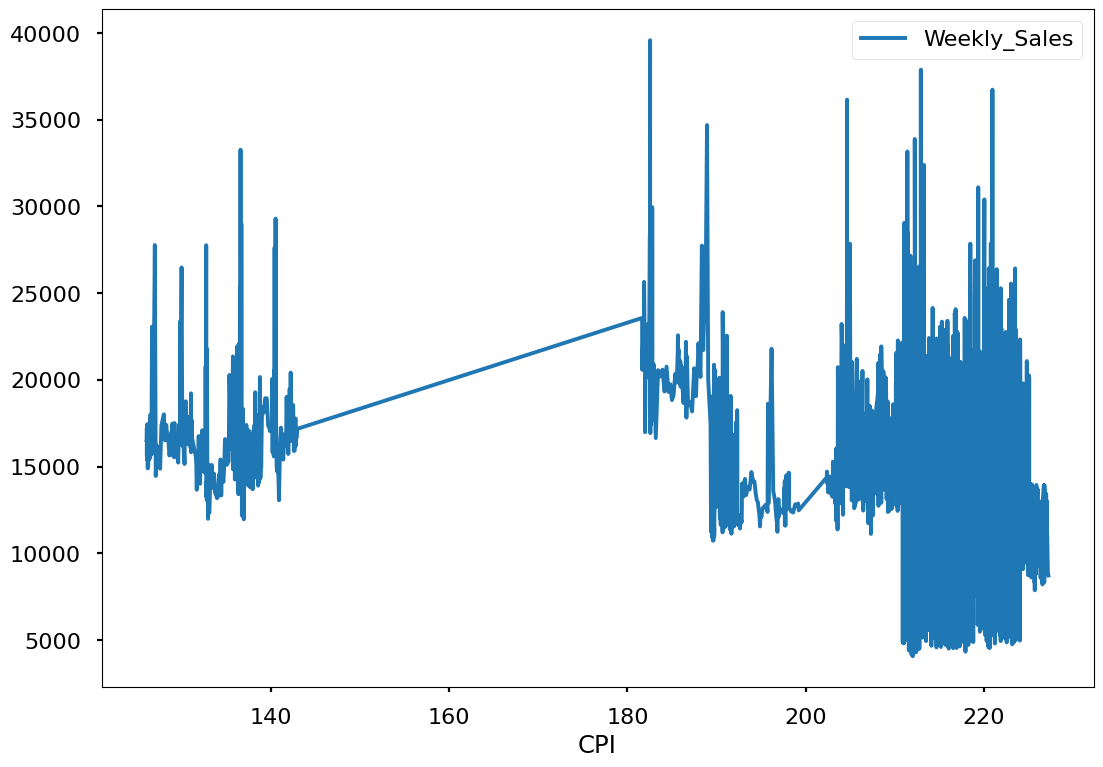

In [ ]:
CPI = pd.pivot_table(df, values = "Weekly_Sales", index= "CPI")
CPI.plot()

<Axes: xlabel='Unemployment'>

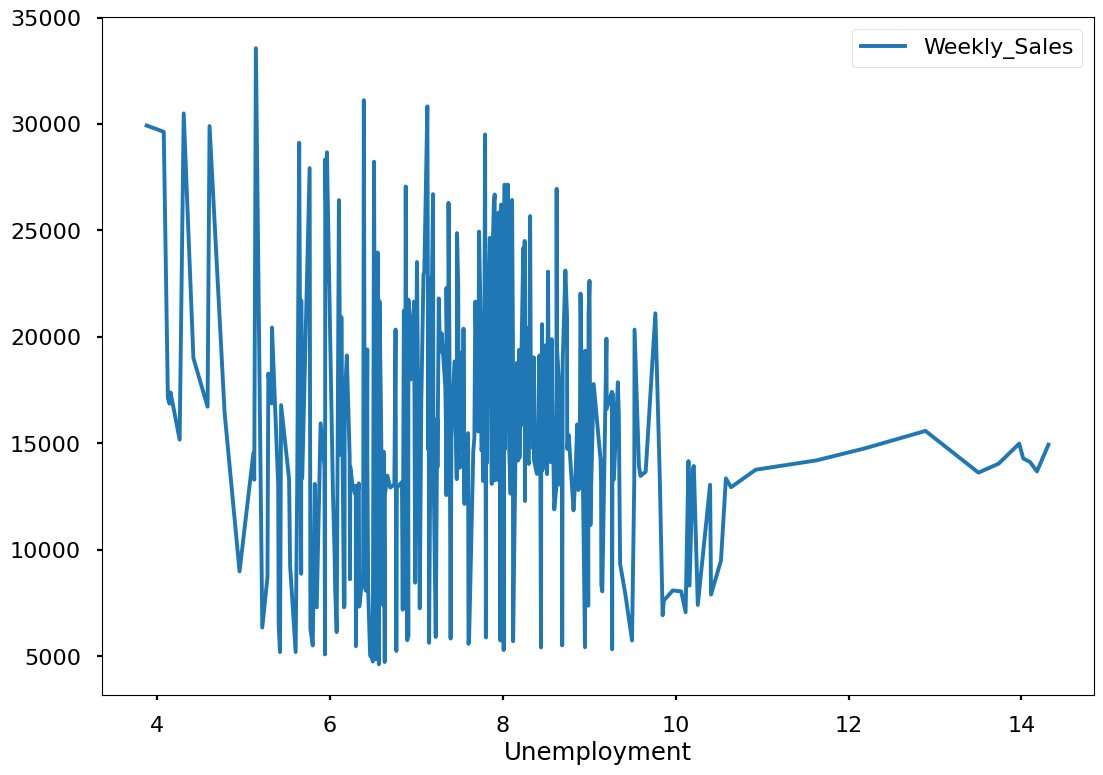

In [ ]:
unemployment = pd.pivot_table(df, values = "Weekly_Sales", index= "Unemployment")
unemployment.plot()

In [ ]:
df.to_csv('clean_data.csv') # assign new data frame to csv for using after here

# Findings and Explorations





Cleaning Process


Dữ liệu không có quá nhiều giá trị bị thiếu.

Tất cả các cột đã được kiểm tra.

Tôi chọn những hàng có doanh số hàng tuần cao hơn 0.

Giá trị âm là 0,3% dữ liệu.

Vì vậy, tôi đã đánh rơi chúng. Giá trị null trong markdowns đã thay đổi thành 0. Bởi vì, chúng được viết là null nếu không có sự giảm giá đối với bộ phận này.

WMAPE (Weighted Mean Absolute Percentage Error) và WMAE (Weighted Mean Absolute Error) đều là các phương pháp đo lường sự sai lệch giữa các dự đoán và giá trị thực tế trong mô hình học máy.

Tùy thuộc vào tình huống cụ thể, một trong hai phương pháp này có thể được ưa chuộng hơn:

WMAPE (Weighted Mean Absolute Percentage Error):

WMAPE được sử dụng khi bạn quan tâm đến tỷ lệ phần trăm sai lệch giữa dự đoán và giá trị thực tế. Nó thường được ưa chuộng trong các tình huống mà sai lệch tương đối quan trọng hơn so với sai lệch tuyệt đối.
Ví dụ: Khi dự đoán tỷ lệ tăng trưởng kinh tế, tỷ lệ lợi nhuận, hoặc tỷ lệ sự tăng của một số chỉ số khác.
WMAE (Weighted Mean Absolute Error):

WMAE được sử dụng khi bạn quan tâm đến sự sai lệch tuyệt đối giữa dự đoán và giá trị thực tế. Nó tập trung vào mức độ chính xác của các dự đoán và không quan tâm đến tỷ lệ sai lệch so với giá trị thực tế.
Ví dụ: Khi dự đoán các giá trị tuyệt đối như doanh số bán hàng, thu nhập, hoặc các đại lượng không có tính phần trăm.
Cả hai độ đo đều hữu ích và phụ thuộc vào mục tiêu cụ thể của mô hình và ngữ cảnh ứng dụng. Việc sử dụng WMAPE hay WMAE thường được quyết định dựa trên tính chất của dữ liệu và mục tiêu dự đoán của mô hình.






Regenerate


First, let us understand the terms **Absolute error** and **relative error.**

# Choose evaluate the accuracy of forecasting models

Absoute 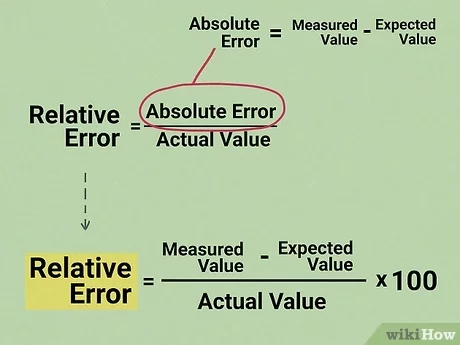

Mean Absolute Percentage Error (MAE) shows us how much inaccuracy ( deviation or error in %) we should expect from our predictions on average.

MAE is given by the following formula:
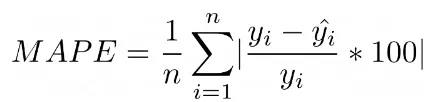

Mathematically, WMAPE is given by the formula:

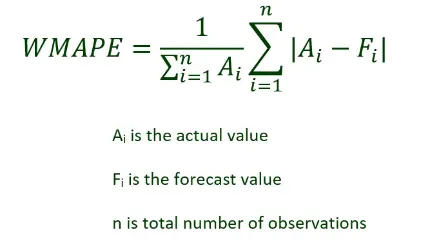

also WMAE

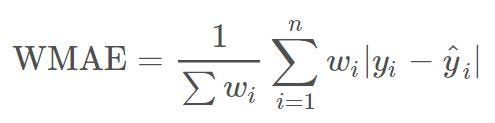


where

n is the number of rows

ŷ i is the predicted sales

yi is the actual sales

wi are weights. w = 5 if the week is a holiday week, 1 otherwise





có 2 phương pháp để đánh giá như đã giải thích ở trên WMPAE được sử dụng để quan tâm đến tỷ lệ phần trăm sai lệch giữa dự đoán và giá trị thực tế và WMAE được sử dụng khi bạn quan tâm đến sự sai lệch tuyệt đối giữa dự đoán và giá trị thực tế nên ở project này chúng ta chọn WMAE

In [ ]:
pd.options.display.max_columns=100 # to see columns


In [ ]:
df = pd.read_csv('./clean_data.csv')


In [ ]:
df.head()

,Unnamed: 0,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,0,1,1,2010-02-05,24924.50,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,1,2,2010-02-05,50605.27,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,2,1,3,2010-02-05,13740.12,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,3,1,4,2010-02-05,39954.04,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,4,1,5,2010-02-05,32229.38,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:
df.drop(columns=['Unnamed: 0'],inplace=True)


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Super_Bowl,Labor_Day,Thanksgiving,Christmas,week,month,year
0,1,1,2010-02-05,24924.50,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
1,1,2,2010-02-05,50605.27,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
2,1,3,2010-02-05,13740.12,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
3,1,4,2010-02-05,39954.04,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010
4,1,5,2010-02-05,32229.38,False,42.31,2.572,7247.781936,3329.917771,1441.588079,3384.71861,4629.478027,211.096358,8.106,A,151315,False,False,False,False,5,2,2010


In [ ]:

# Import label encoder
from sklearn import preprocessing

# label_encoder object knows
# how to understand word labels.
df_encoded = df.copy()
label_encoder = preprocessing.LabelEncoder()
enc = preprocessing.OrdinalEncoder()
df_encoded['Type'] = label_encoder.fit_transform(df_encoded['Type'])
df_encoded[['IsHoliday','Labor_Day','Christmas','Thanksgiving','Super_Bowl']] = enc.fit_transform(df_encoded[['IsHoliday','Labor_Day','Christmas','Thanksgiving','Super_Bowl']])

In [ ]:
df_new = df_encoded.copy()

In [ ]:
drop_col = ['Super_Bowl','Labor_Day','Thanksgiving','Christmas']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

<ipython-input-173-ab4966d44f07>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr().abs())    # To see the correlations


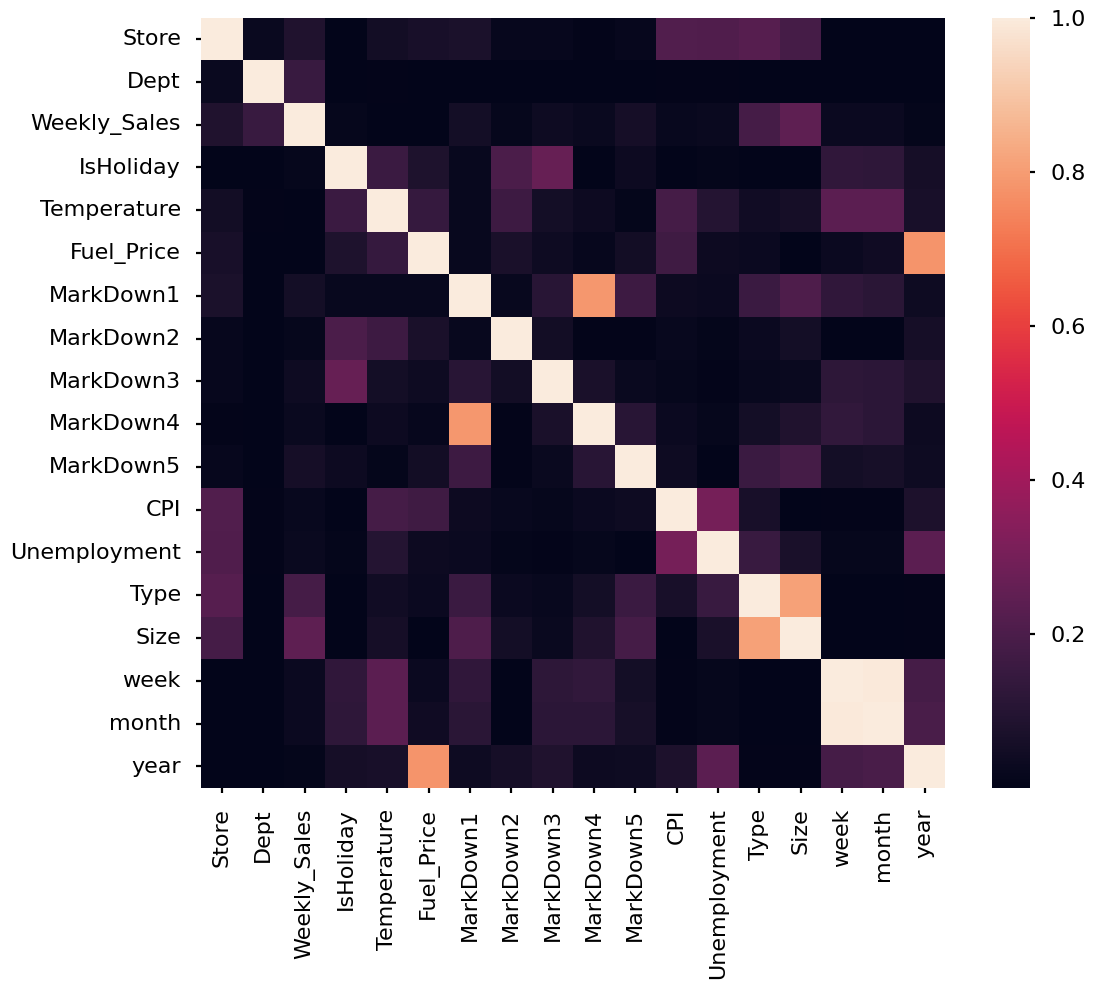

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations
plt.show()

Temperature, unemployment, CPI have no significant effect on weekly sales, so I will drop them. Also, Markdown 4 and 5 highly correlated with Markdown 1. So, I will drop them also. It can create multicollinearity problem, maybe. So, first I will try without them

In [ ]:
drop_col = ['Temperature','MarkDown4','MarkDown5','CPI','Unemployment']
df_new.drop(drop_col, axis=1, inplace=True) # dropping columns

<ipython-input-175-c3c599882984>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns


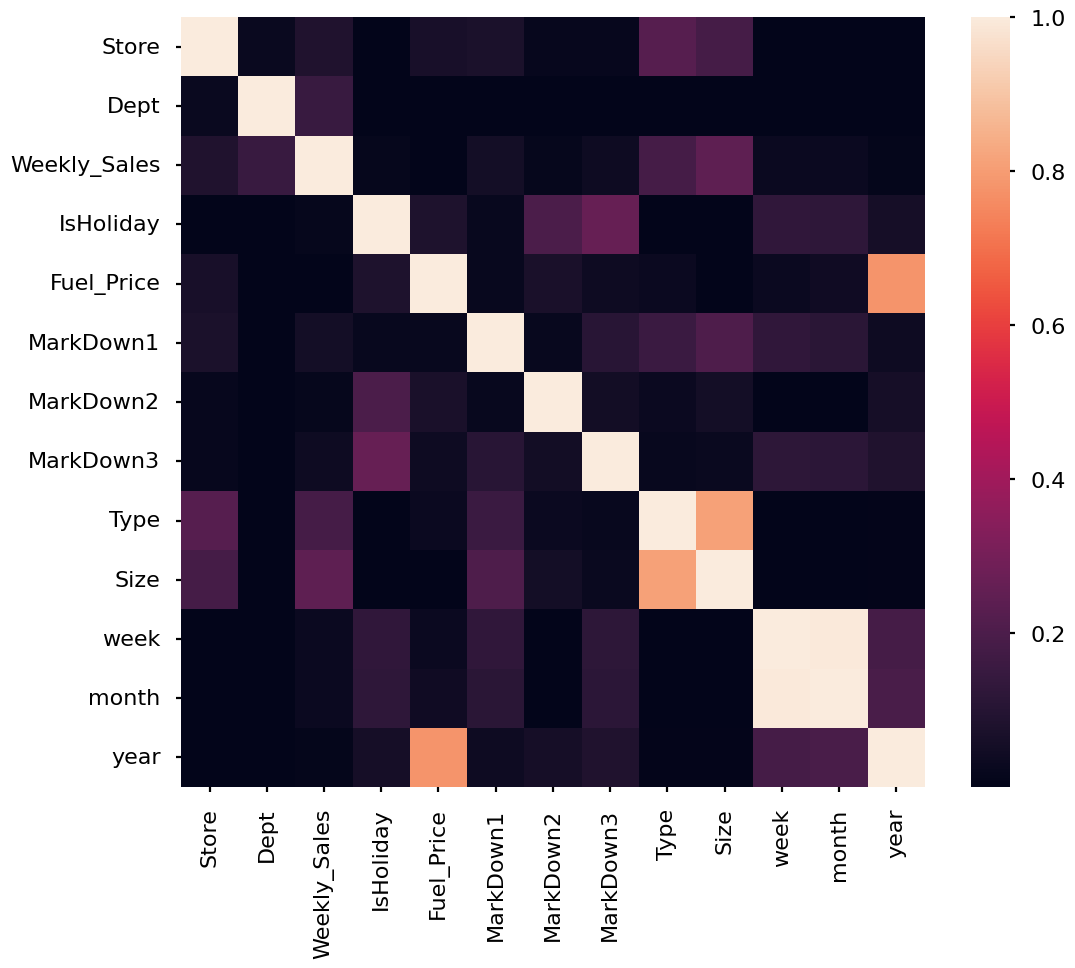

In [ ]:
plt.figure(figsize = (12,10))
sns.heatmap(df_new.corr().abs())    # To see the correlations without dropping columns
plt.show()

In [ ]:
df_new = df_new.sort_values(by='Date', ascending=True) # sorting according to date


# Train test split

Vì dữ liệu liên tục nên không được phép sử dụng random khi train

In [ ]:
train_data = df_new[:int(0.7*(len(df_new)))] # taking train part
test_data = df_new[int(0.7*(len(df_new))):] # taking test part

target = "Weekly_Sales"
used_cols = [c for c in df_new.columns.to_list() if c not in [target]] # all columns except weekly sales

X_train = train_data[used_cols]
X_test = test_data[used_cols]
y_train = train_data[target]
y_test = test_data[target]

In [ ]:
df_test = df

,Store,Dept,Date,Weekly_Sales,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
104687,11,95,2012-01-06,73200.06,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104686,11,94,2012-01-06,36605.81,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104685,11,93,2012-01-06,36193.99,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104684,11,92,2012-01-06,86277.57,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104683,11,91,2012-01-06,43672.98,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329780,34,14,2012-10-26,8930.71,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329781,34,16,2012-10-26,4841.81,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329782,34,17,2012-10-26,7035.13,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329784,34,20,2012-10-26,2124.60,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012


In [ ]:
X_train = X_train.drop(['Date'], axis=1) # dropping date from train
X_test = X_test.drop(['Date'], axis=1) # dropping date from test

# Metric Definition Function


In [ ]:
def wmae_test(test, pred): # WMAE for test
    weights = X_test['IsHoliday'].apply(lambda is_holiday:5 if is_holiday else 1)
    error = np.sum(weights * np.abs(test - pred), axis=0) / np.sum(weights)
    return error

# Selection Models



Ở bài này chúng ta sử dụng models Random Forest Regressor
Nói sơ qua về Random Forest Regressor

Random Forest Regressor là một models Machine Learning thường được sử dụng để dự đoán các project liên quan đến regressor nó cho ra hiệu suất và dự đoán có tỷ lệ phần trăm cao



Random Forest hoạt động theo nguyên tắc đóng bao được gọi là (Bagging)

Đi sau về kỹ thuật bagging

Bagging, also known as Bootstrap Aggregation, serves as the ensemble technique in the Random Forest algorithm. Here are the steps involved in Bagging:

Selection of Subset: Bagging starts by choosing a random sample, or subset, from the entire dataset.

Bootstrap Sampling: Each model is then created from these samples, called Bootstrap Samples, which are taken from the original data with replacement. This process is known as row sampling.
Bootstrapping: The step of row sampling with replacement is referred to as bootstrapping.

Independent Model Training: Each model is trained independently on its corresponding Bootstrap Sample. This training process generates results for each model.

Majority Voting: The final output is determined by combining the results of all models through majority voting. The most commonly predicted outcome among the models is selected.

Aggregation: This step, which involves combining all the results and generating the final output based on majority voting, is known as aggregation.

**Steps Involved in Random Forest Algorithm**

    Step 1: In the Random forest model, a subset of data points and a subset of features is selected for constructing each decision tree. Simply put, n random records and m features are taken from the data set having k number of records.

    Step 2: Individual decision trees are constructed for each sample.


    Step 3: Each decision tree will generate an output.


    Step 4: Final output is considered based on Majority Voting or Averaging for Classification and regression, respectively.

Để tiết kiệm thời gian chúng sử dụng models có sẵn

In [ ]:
# import numpy as np

# class DecisionTreeRegressor:
#     def __init__(self, max_depth=None, min_samples_split=2):
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.feature_index = None
#         self.threshold = None
#         self.left = None
#         self.right = None
#         self.value = None

#     def fit(self, X, y):
#         if self.max_depth is not None and self.max_depth == 0:
#             self.value = np.mean(y)
#             return

#         if len(set(y)) == 1:
#             self.value = y.iloc[0]
#             return

#         if len(X) < self.min_samples_split:
#             self.value = np.mean(y)
#             return

#         # Chọn feature và threshold tốt nhất để chia dữ liệu
#         best_feature, best_threshold, best_score = None, None, float('inf')
#         for feature_index in range(X.shape[1]):
#             thresholds = np.unique(X.iloc[:, feature_index])
#             for threshold in thresholds:
#                 left_mask = X.iloc[:, feature_index] <= threshold
#                 right_mask = ~left_mask
#                 if len(y[left_mask]) < self.min_samples_split or len(y[right_mask]) < self.min_samples_split:
#                     continue

#                 score = self._calculate_score(y[left_mask], y[right_mask])
#                 if score < best_score:
#                     best_feature = feature_index
#                     best_threshold = threshold
#                     best_score = score

#         if best_score == float('inf'):
#             self.value = np.mean(y)
#             return

#         self.feature_index = best_feature
#         self.threshold = best_threshold

#         left_mask = X.iloc[:, best_feature] <= best_threshold
#         right_mask = ~left_mask

#         self.left = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
#         self.left.fit(X[left_mask], y[left_mask])

#         self.right = DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
#         self.right.fit(X[right_mask], y[right_mask])

#     def _calculate_score(self, left_y, right_y):
#         return len(left_y) * np.var(left_y) + len(right_y) * np.var(right_y)

#     def predict_instance(self, x):
#         if self.value is not None:
#             return self.value

#         if X.iloc[self.feature_index] <= self.threshold:
#             return self.left.predict_instance(x)
#         else:
#             return self.right.predict_instance(x)

#     def predict(self, X):
#         return np.array([self.predict_instance(x) for x in X])


# class RandomForestRegressor:
#     def __init__(self, n_estimators=100, max_depth=None, min_samples_split=2, random_state=None):
#         self.n_estimators = n_estimators
#         self.max_depth = max_depth
#         self.min_samples_split = min_samples_split
#         self.random_state = random_state
#         self.trees = [DecisionTreeRegressor(max_depth=self.max_depth, min_samples_split=self.min_samples_split)
#                       for _ in range(n_estimators)]

#     def fit(self, X, y):
#         if self.random_state is not None:
#             np.random.seed(self.random_state)
#         for i in range(self.n_estimators):
#             X_sample, y_sample = self.bootstrap_sample(X, y)
#             self.trees[i].fit(X_sample, y_sample)

#     def bootstrap_sample(self, X, y):
#         indices = np.random.randint(0, len(X), len(X))
#         return X.iloc[indices], y.iloc[indices]

#     def predict(self, X):
#         predictions = np.zeros(len(X))
#         for tree in self.trees:
#             predictions += tree.predict(X)
#         return predictions / self.n_estimators


# # Sử dụng mô hình

# # Tạo dữ liệu mẫu (hãy thay thế dữ liệu thực tế của bạn ở đây)
# # Ví dụ: X là ma trận đặc trưng, y là mục tiêu cần dự đoán
# # X, y = ...

# # Chia dữ liệu thành tập huấn luyện và tập kiểm tra

# # Khởi tạo và huấn luyện mô hình
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# model.fit(X_train, y_train)

# # Dự đoán trên tập kiểm tra
# y_pred = model.predict(X_test)

# # Đánh giá hiệu suất của mô hình
# mse = np.mean((y_test - y_pred)**2)
# rmse = np.sqrt(mse)

# print(f'Root Mean Squared Error (RMSE): {rmse}')


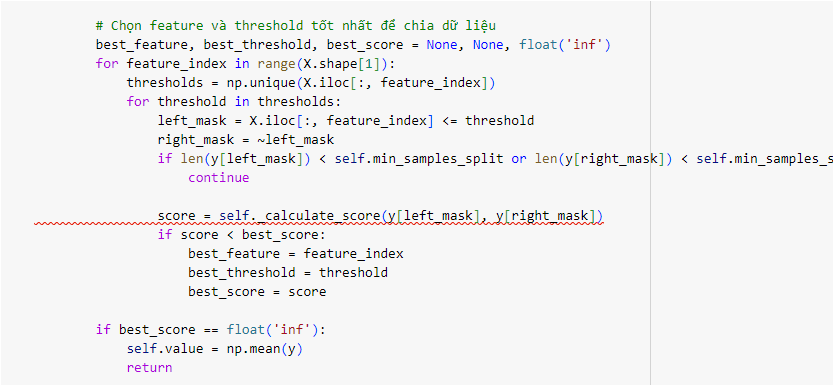

đoạn code này chúng là ý chính của thuật toán tree decision
best_feature, best_threshold, best_score = None, None, float('inf'): Khởi tạo các biến để lưu trữ thông tin về phân vùng tốt nhất (ban đầu, không có phân vùng nào nên điểm đánh giá ban đầu được đặt là vô cùng lớn).

for feature_index in range(X.shape[1]):: Bắt đầu vòng lặp qua tất cả các thuộc tính (features) trong tập dữ liệu.

thresholds = np.unique(X[:, feature_index]): Lấy ra tất cả các ngưỡng duy nhất trong thuộc tính hiện tại.

for threshold in thresholds:: Bắt đầu vòng lặp qua tất cả các ngưỡng.

left_mask = X[:, feature_index] <= threshold: Tạo mặt nạ (mask) cho các mẫu có giá trị thuộc tính nhỏ hơn hoặc bằng ngưỡng.

right_mask = ~left_mask: Tạo mặt nạ cho các mẫu có giá trị thuộc tính lớn hơn ngưỡng.

if len(y[left_mask]) < self.min_samples_split or len(y[right_mask]) < self.min_samples_split:: Kiểm tra xem số lượng mẫu trong cả hai phân vùng có đủ lớn không. Nếu không, tiếp tục với ngưỡng tiếp theo.

score = self._calculate_score(y[left_mask], y[right_mask]): Tính điểm đánh giá cho phân vùng hiện tại bằng cách gọi hàm _calculate_score đã được giải thích trước đó.

if score < best_score:: So sánh điểm đánh giá của phân vùng hiện tại với phân vùng tốt nhất hiện tại. Nếu điểm đánh giá của phân vùng hiện tại tốt hơn, cập nhật thông tin của phân vùng tốt nhất.

if best_score == float('inf'):: Kiểm tra nếu điểm đánh giá tốt nhất vẫn không thay đổi từ giá trị ban đầu (nghĩa là không có phân vùng nào tốt hơn được tìm thấy).

self.value = np.mean(y): Đặt giá trị của nút lá là giá trị trung bình của mục tiêu.

return: Trả về kết quả hoặc thông báo kết thúc thuật toán xây dựng cây quyết định.

exmaple về mask (mặt nạ )

In [ ]:
import numpy as np

# Tạo một mảng giả định của tuổi
age = np.array([25, 32, 19, 40, 28, 35, 22, 31])

# Lặp qua tất cả các giá trị trong age để sử dụng làm ngưỡng
for threshold in age:
    left_mask = age <= threshold
    right_mask = ~left_mask

    # In thông tin về phân vùng
    print(f'Threshold: {threshold}')
    print(f'Left Partition (age <= {threshold}): {age[left_mask]}')
    print(f'Right Partition (age > {threshold}): {age[right_mask]}')
    print('-' * 30)


Threshold: 25
Left Partition (age <= 25): [25 19 22]
Right Partition (age > 25): [32 40 28 35 31]
------------------------------
Threshold: 32
Left Partition (age <= 32): [25 32 19 28 22 31]
Right Partition (age > 32): [40 35]
------------------------------
Threshold: 19
Left Partition (age <= 19): [19]
Right Partition (age > 19): [25 32 40 28 35 22 31]
------------------------------
Threshold: 40
Left Partition (age <= 40): [25 32 19 40 28 35 22 31]
Right Partition (age > 40): []
------------------------------
Threshold: 28
Left Partition (age <= 28): [25 19 28 22]
Right Partition (age > 28): [32 40 35 31]
------------------------------
Threshold: 35
Left Partition (age <= 35): [25 32 19 28 35 22 31]
Right Partition (age > 35): [40]
------------------------------
Threshold: 22
Left Partition (age <= 22): [19 22]
Right Partition (age > 22): [25 32 40 28 35 31]
------------------------------
Threshold: 31
Left Partition (age <= 31): [25 19 28 22 31]
Right Partition (age > 31): [32 40 35

Thuật toán khác về decision tree của thầy andrew ng

As you saw in the lectures, in a decision tree, we decide if a node will be split or not by looking at the **information gain** that split would give us. (Image of video IG)

Where

$$\text{Information Gain} = H(p_1^\text{node})- \left(w^{\text{left}}H\left(p_1^\text{left}\right) + w^{\text{right}}H\left(p_1^\text{right}\right)\right),$$

and $H$ is the entropy, defined as

$$H(p_1) = -p_1 \text{log}_2(p_1) - (1- p_1) \text{log}_2(1- p_1)$$

Remember that log here is defined to be in base 2. Run the code block below to see by yourself how the entropy. $H(p)$ behaves while $p$ varies.

Note that the H attains its higher value when $p = 0.5$. This means that the probability of event is $0.5$. And its minimum value is attained in $p = 0$ and $p = 1$, i.e., the probability of the event happening is totally predictable. Thus, the entropy shows the degree of predictability of an event.

chúng ta có thể minh hoa thuật trên bằng một bài toán đơn giản

có một table data đơn giản như sau

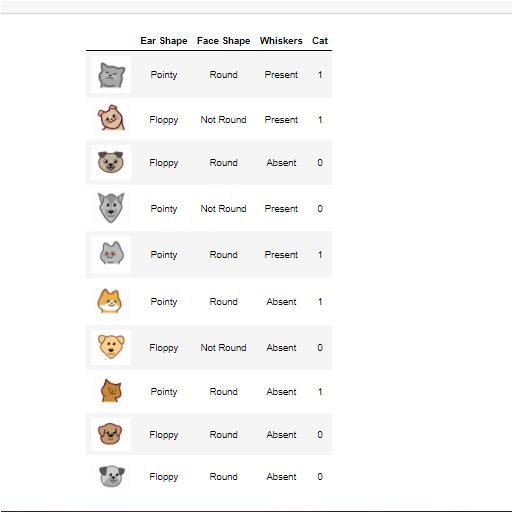

We will use one-hot encoding to encode the categorical features. They will be as follows:

Ear Shape: Pointy = 1, Floppy = 0
Face Shape: Round = 1, Not Round = 0
Whiskers: Present = 1, Absent = 0
Therefore, we have two sets:

X_train: for each example, contains 3 features:

      - Ear Shape (1 if pointy, 0 otherwise)
      - Face Shape (1 if round, 0 otherwise)
      - Whiskers (1 if present, 0 otherwise)
y_train: whether the animal is a cat

      - 1 if the animal is a cat
      - 0 otherwise

In [ ]:
X_train = np.array([[1, 1, 1],
[0, 0, 1],
 [0, 1, 0],
 [1, 0, 1],
 [1, 1, 1],
 [1, 1, 0],
 [0, 0, 0],
 [1, 1, 0],
 [0, 1, 0],
 [0, 1, 0]])

y_train = np.array([1, 1, 0, 0, 1, 1, 0, 1, 0, 0])

This means that the first example has a pointy ear shape, round face shape and it has whiskers.

On each node, we compute the information gain for each feature, then split the node on the feature with the higher information gain, by comparing the entropy of the node with the weighted entropy in the two splitted nodes.

So, the root node has every animal in our dataset. Remember that $p_1^{node}$ is the proportion of positive class (cats) in the root node. So

$$p_1^{node} = \frac{5}{10} = 0.5$$

Now let's write a function to compute the entropy.

H(p) là function entropy được định nghĩa như trên

In [ ]:
def entropy(p):
    if p == 0 or p == 1:
        return 0
    else:
        return -p * np.log2(p) - (1- p)*np.log2(1 - p)

To illustrate, let's compute the information gain if we split the node for each of the features. To do this, let's write some functions.

In [ ]:
def split_indices(X, index_feature):
    """Given a dataset and a index feature, return two lists for the two split nodes, the left node has the animals that have
    that feature = 1 and the right node those that have the feature = 0
    index feature = 0 => ear shape
    index feature = 1 => face shape
    index feature = 2 => whiskers
    """
    left_indices = []
    right_indices = []
    for i,x in enumerate(X):
        if x[index_feature] == 1:
            left_indices.append(i)
        else:
            right_indices.append(i)
    return left_indices, right_indices

So, if we choose Ear Shape to split, then we must have in the left node (check the table above) the indices:

$$0 \quad 3 \quad 4 \quad 5 \quad 7$$

and the right indices, the remaining ones.

In [ ]:
split_indices(X_train, 0)
# split_indices(X_train, 1)
# split_indices(X_train, 2)

([0, 3, 4, 5, 7], [1, 2, 6, 8, 9])

Now we need another function to compute the weighted entropy in the splitted nodes. As you've seen in the video lecture, we must find:

- $w^{\text{left}}$ and $w^{\text{right}}$, the proportion of animals in **each node**.
- $p^{\text{left}}$ and $p^{\text{right}}$, the proportion of cats in **each split**.

Note the difference between these two definitions!! To illustrate, if we split the root node on the feature of index 0 (Ear Shape), then in the left node, the one that has the animals 0, 3, 4, 5 and 7, we have:

$$w^{\text{left}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{left}} = \frac{4}{5}$$
$$w^{\text{right}}= \frac{5}{10} = 0.5 \text{ and } p^{\text{right}} = \frac{1}{5}$$

In [ ]:
def weighted_entropy(X,y,left_indices,right_indices):
    """
    This function takes the splitted dataset, the indices we chose to split and returns the weighted entropy.
    """
    w_left = len(left_indices)/len(X)
    w_right = len(right_indices)/len(X)
    p_left = sum(y[left_indices])/len(left_indices)
    p_right = sum(y[right_indices])/len(right_indices)

    weighted_entropy = w_left * entropy(p_left) + w_right * entropy(p_right)
    return weighted_entropy

In [ ]:
def information_gain(X, y, left_indices, right_indices):
    """
    Here, X has the elements in the node and y is theirs respectives classes
    """
    p_node = sum(y)/len(y)
    h_node = entropy(p_node)
    w_entropy = weighted_entropy(X,y,left_indices,right_indices)
    return h_node - w_entropy

In [ ]:
for i, feature_name in enumerate(['Ear Shape', 'Face Shape', 'Whiskers']):
    left_indices, right_indices = split_indices(X_train, i)
    i_gain = information_gain(X_train, y_train, left_indices, right_indices)
    print(f"Feature: {feature_name}, information gain if we split the root node using this feature: {i_gain:.2f}")

Feature: Ear Shape, information gain if we split the root node using this feature: 0.28
Feature: Face Shape, information gain if we split the root node using this feature: 0.03
Feature: Whiskers, information gain if we split the root node using this feature: 0.12


So, the best feature to split is indeed the Ear Shape. Run the code below to see the split in action. You do not need to understand the following code block.

# Build mode

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline

In [ ]:
X_train

,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,0.0,2.572,7247.781936,3329.917771,1441.588079,0,151315,5,2,2010
329839,35,3,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329840,35,4,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329841,35,5,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329842,35,6,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
94613,10,40,0.0,3.443,7737.750000,38456.090000,39.720000,1,126512,1,1,2012
94615,10,42,0.0,3.443,7737.750000,38456.090000,39.720000,1,126512,1,1,2012
94598,10,24,0.0,3.443,7737.750000,38456.090000,39.720000,1,126512,1,1,2012
94634,10,81,0.0,3.443,7737.750000,38456.090000,39.720000,1,126512,1,1,2012


In [ ]:
X_test

,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
104687,11,95,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104686,11,94,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104685,11,93,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104684,11,92,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
104683,11,91,0.0,3.157,5107.29,32305.30,144.66,0,207499,1,1,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
329780,34,14,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329781,34,16,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329782,34,17,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012
329784,34,20,0.0,3.514,1151.88,68.01,3.00,0,158114,43,10,2012


In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()



#making pipe tp use scaler and regressor together
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train, y_train)

# predictions on train set
y_pred = pipe.predict(X_train)

# predictions on test set
y_pred_test = pipe.predict(X_test)

In [ ]:
wmae_test(y_test, y_pred_test)

5753.700520435181

# To see feature importance

In [ ]:
X = df_new[used_cols] # to keep train and test X values together
X = X.drop(['Date'], axis=1) #dropping date column from X


In [ ]:
X

,Store,Dept,IsHoliday,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,Type,Size,week,month,year
0,1,1,0.0,2.572,7247.781936,3329.917771,1441.588079,0,151315,5,2,2010
329839,35,3,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329840,35,4,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329841,35,5,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
329842,35,6,0.0,2.784,7247.781936,3329.917771,1441.588079,1,103681,5,2,2010
...,...,...,...,...,...,...,...,...,...,...,...,...
329780,34,14,0.0,3.514,1151.880000,68.010000,3.000000,0,158114,43,10,2012
329781,34,16,0.0,3.514,1151.880000,68.010000,3.000000,0,158114,43,10,2012
329782,34,17,0.0,3.514,1151.880000,68.010000,3.000000,0,158114,43,10,2012
329784,34,20,0.0,3.514,1151.880000,68.010000,3.000000,0,158114,43,10,2012


[ 1  8  0  7  9  3 10  6  4  5  2 11]
Feature ranking:
1. feature 1 (0.734819)
Store
2. feature 8 (0.104949)
Dept
3. feature 0 (0.058085)
IsHoliday
4. feature 7 (0.038092)
Fuel_Price
5. feature 9 (0.021873)
MarkDown1
6. feature 3 (0.018343)
MarkDown2
7. feature 10 (0.008972)
MarkDown3
8. feature 6 (0.004431)
Type
9. feature 4 (0.003379)
Size
10. feature 5 (0.003026)
week
11. feature 2 (0.002372)
month
12. feature 11 (0.001657)
year


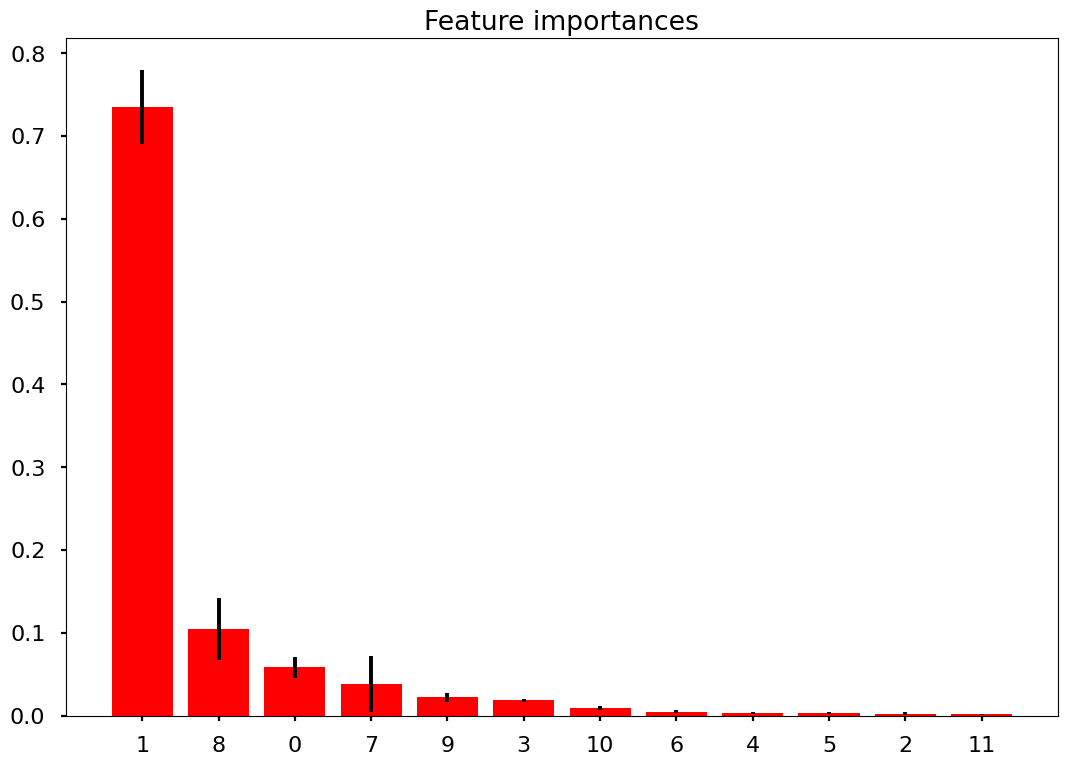

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Printing the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
    print(X.columns[f])

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
X1_train = X_train.drop(['month'], axis=1) # dropping month
X1_test = X_test.drop(['month'], axis=1)

Model Again without Month

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X1_train, y_train)

# predictions on train set
y_pred = pipe.predict(X1_train)

# predictions on test set
y_pred_test = pipe.predict(X1_test)

In [ ]:
wmae_test(y_test, y_pred_test)

5737.8391860391475

In [ ]:
# splitting train-test to whole dataset
train_data_enc = df_encoded[:int(0.7*(len(df_encoded)))]
test_data_enc = df_encoded[int(0.7*(len(df_encoded))):]

target = "Weekly_Sales"
used_cols1 = [c for c in df_encoded.columns.to_list() if c not in [target]] # all columns except price

X_train_enc = train_data_enc[used_cols1]
X_test_enc = test_data_enc[used_cols1]
y_train_enc = train_data_enc[target]
y_test_enc = test_data_enc[target]

In [ ]:
print(len(used_cols1))

22


Model with Whole Data


In [ ]:
X_enc = df_encoded[used_cols1] # to get together train,test splits
X_enc = X_enc.drop(['Date'], axis=1) #d

In [ ]:
X_train_enc = X_train_enc.drop(['Date'], axis=1) # dropping date from train and test
X_test_enc= X_test_enc.drop(['Date'], axis=1)

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=35,
                           max_features = 'sqrt',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc, y_train_enc)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc)

In [ ]:
wmae_test(y_test_enc, y_pred_test_enc)

2485.5754711130744

Feature Importance for Whole Encoded Dataset


In [ ]:
X_enc.shape[1]

21

[ 1 13 12  0 10 11 18  3  4 19  9  5  7  8  6 20 16  2 17 14 15]
Feature ranking:


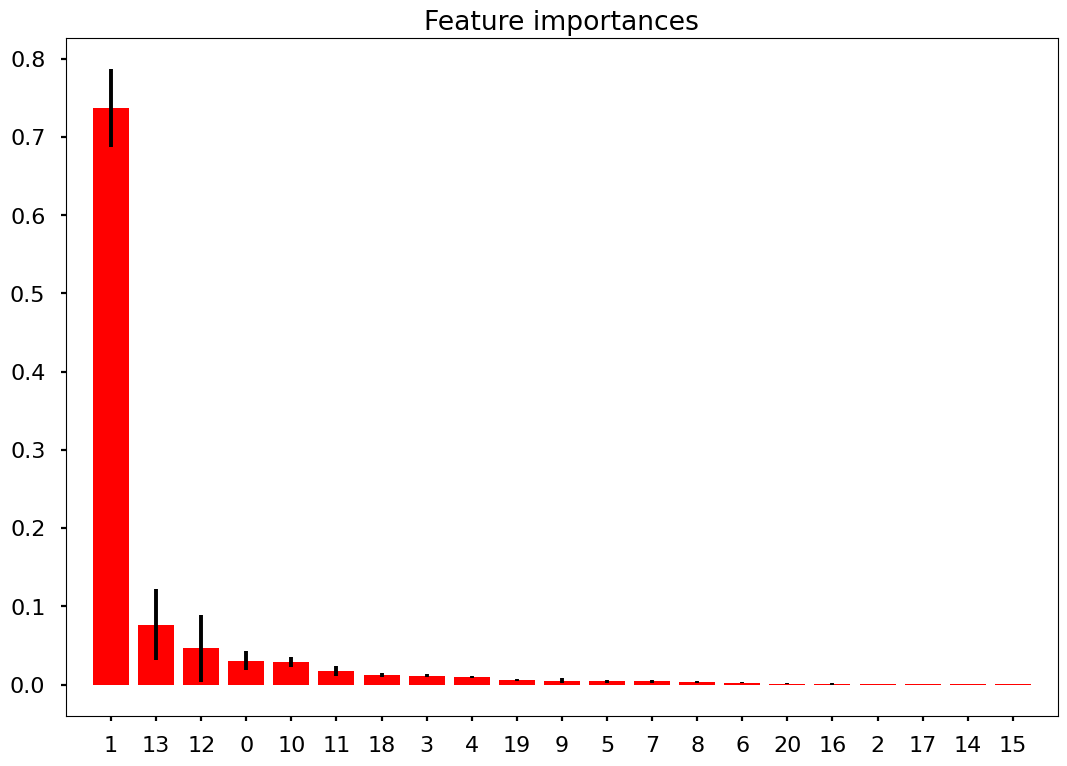

In [ ]:
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)
# Printing the feature ranking
print("Feature ranking:")

# for f in range(X_enc.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plotting the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_enc.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_enc.shape[1]), indices)
plt.xlim([-1, X_enc.shape[1]])
plt.show()

In [ ]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

Model According to Feature Importance¶


In [ ]:
drop_col

['Temperature', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']

In [ ]:
df_encoded_new = df_encoded.copy() # taking copy of encoded data to keep it without change.
df_encoded_new.drop(drop_col, axis=1, inplace=True)

In [ ]:
#train-test splitting
train_data_enc_new = df_encoded_new[:int(0.7*(len(df_encoded_new)))]
test_data_enc_new = df_encoded_new[int(0.7*(len(df_encoded_new))):]

target = "Weekly_Sales"
used_cols2 = [c for c in df_encoded_new.columns.to_list() if c not in [target]] # all columns except price

X_train_enc1 = train_data_enc_new[used_cols2]
X_test_enc1 = test_data_enc_new[used_cols2]
y_train_enc1 = train_data_enc_new[target]
y_test_enc1 = test_data_enc_new[target]

#droping date from train-test
X_train_enc1 = X_train_enc1.drop(['Date'], axis=1)
X_test_enc1= X_test_enc1.drop(['Date'], axis=1)

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

In [ ]:
pipe.score(X_test_enc1,y_test_enc1)

0.745712433715259

In [ ]:
wmae_test(y_test_enc1, y_pred_test_enc)

1808.5024940360665

Model with Dropping Month Column


In [ ]:
df_encoded_new1 = df_encoded.copy()
df_encoded_new1.drop(drop_col, axis=1, inplace=True)

In [ ]:
df_encoded_new1 = df_encoded_new1.drop(['Date'], axis=1)


In [ ]:
df_encoded_new1 = df_encoded_new1.drop(['month'], axis=1)


In [ ]:
#train-test split
train_data_enc_new1 = df_encoded_new1[:int(0.7*(len(df_encoded_new1)))]
test_data_enc_new1 = df_encoded_new1[int(0.7*(len(df_encoded_new1))):]

target = "Weekly_Sales"
used_cols3 = [c for c in df_encoded_new1.columns.to_list() if c not in [target]] # all columns except price

X_train_enc2 = train_data_enc_new1[used_cols3]
X_test_enc2 = test_data_enc_new1[used_cols3]
y_train_enc2 = train_data_enc_new1[target]
y_test_enc2 = test_data_enc_new1[target]

In [ ]:
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc2, y_train_enc2)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc2)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc2)

In [ ]:
pipe.score(X_test_enc2,y_test_enc2)

0.684817803666326

In [ ]:
wmae_test(y_test_enc2, y_pred_test_enc)


2197.347880772553

Tổng kết lại

In [ ]:
df_results = pd.DataFrame(columns=["Model", "Info",'WMAE']) # result df for showing results together

df_results = df_results.append({
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out divided holiday columns' ,
       'WMAE' : 5850}, ignore_index=True)
df_results = df_results.append({
     "Model": 'RandomForestRegressor' ,
      "Info": 'w/out month column' ,
       'WMAE' : 5494}, ignore_index=True)
df_results = df_results.append({
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data' ,
       'WMAE' : 2450}, ignore_index=True)
df_results = df_results.append({
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection' ,
       'WMAE' : 1801}, ignore_index=True)
df_results = df_results.append({
     "Model": 'RandomForestRegressor' ,
      "Info": 'whole data with feature selection w/out month' ,
       'WMAE' : 2093}, ignore_index=True)

<ipython-input-264-b458012bd6b4>:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-264-b458012bd6b4>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-264-b458012bd6b4>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-264-b458012bd6b4>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-264-b458012bd6b4>:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results

In [ ]:
df_results


,Model,Info,WMAE
0,RandomForestRegressor,w/out divided holiday columns,5850
1,RandomForestRegressor,w/out month column,5494
2,RandomForestRegressor,whole data,2450
3,RandomForestRegressor,whole data with feature selection,1801
4,RandomForestRegressor,whole data with feature selection w/out month,2093


Model 3

In [ ]:
rf = RandomForestRegressor(n_estimators=50, random_state=42, n_jobs=-1, max_depth=40,
                           max_features = 'log2',min_samples_split = 10)

scaler=RobustScaler()
pipe = make_pipeline(scaler,rf)

pipe.fit(X_train_enc1, y_train_enc1)

# predictions on train set
y_pred_enc = pipe.predict(X_train_enc1)

# predictions on test set
y_pred_test_enc = pipe.predict(X_test_enc1)

pipe.score(X_test_enc1,y_test_enc1)
wmae_test(y_test_enc1, y_pred_test_enc)

1808.5024940360665

In [ ]:
y_pred_enc

array([29702.83517972, 43080.83957523, 22705.4698126 , ...,
        2901.62885423,  2838.67497858,  5087.84781783])

# Training ANAI

In [ ]:
!pip install anai-opensource


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 11.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.4/300.4 kB 37.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 46.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 671.3/671.3 kB 25.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 47.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 21.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 74.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [ ]:
import anai

INFO:distributed.http.proxy:To route to workers diagnostics web server please install jupyter-server-proxy: python -m pip install jupyter-server-proxy
INFO:distributed.scheduler:State start
INFO:distributed.scheduler:  Scheduler at:   tcp://172.28.0.12:42013
INFO:distributed.scheduler:  dashboard at:  http://172.28.0.12:8787/status
INFO:distributed.nanny:        Start Nanny at: 'tcp://172.28.0.12:37235'
INFO:distributed.nanny:        Start Nanny at: 'tcp://172.28.0.12:41151'
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://172.28.0.12:40895', name: 1, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://172.28.0.12:40895
INFO:distributed.core:Starting established connection to tcp://172.28.0.12:45530
INFO:distributed.scheduler:Register worker <WorkerState 'tcp://172.28.0.12:32861', name: 0, status: init, memory: 0, processing: 0>
INFO:distributed.scheduler:Starting worker compute stream, tcp://172.28.0.12:32861
INFO:dist

ImportError: ignored

In [ ]:
ai = anai.run(df_encoded_new.drop('Date',axis=1), target="Weekly_Sales", predictor=["rfr"])

NameError: ignored